In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
ndigits = 10

#IDEAL BENFORD LAW
p_ndigits = np.log(1 + 1/np.arange(1, ndigits))/np.log(ndigits)

def bentest(arr, ndigits=10, normalize=False):    
    ben_test = np.zeros(ndigits-1)
    for i in arr:
        try:
            ben_test[int(str(i).replace('0.', '').replace('-', '').replace('0', '')[0]) -1] += 1
        except:
            pass
    if normalize:
        return ben_test/np.sum(ben_test)
    return ben_test

In [3]:
loc = 2
scale = 3

arr1= np.random.randint(1, 1000, 1000) #DOES NOT FOLLOW BENFORD'S LAW

arr2 = np.random.normal(loc, scale, 1000) #DOES NOT FOLLOW BENFORD'S LAW
arr3 = np.random.uniform(loc, scale, 1000) #DOES NOT FOLLOW BENFORD'S LAW
arr4 = np.random.lognormal(loc, scale, 1000) #FOLLOWS BENFORD'S LAW
arr5 = np.random.exponential(loc, 1000) #FOLLOWS BENFORD'S LAW
arr6 = np.random.poisson(loc, 1000) #FOLLOWS BENFORD'S LAW

In [4]:
def benford_cdf(x):
    #Returns the CDF of FIRST DIGIT OF GIVEN INPUT x
    ndigits=10
    if x == 0 or x>9:
        return 0

    x1 = int(str(abs(x)).replace('.', '').replace('0', '')[0]) #FIND FIRST DIGIT
    p_D1 = np.log(x1 + 1)/np.log(ndigits)   #FIND PROBABILITY OF FIRST DIGIT
    return p_D1
    

temp = np.vectorize(benford_cdf)

In [74]:
def chisq_ben(arr, ndigits=10, normalize=False, i=None, suptitle=None, fntype=None):
    pd_cap = bentest(arr, ndigits=ndigits, normalize=normalize)
    O_d = len(arr1) * pd_cap
    E_d = len(arr1) * p_ndigits
    chisq = stats.chisquare(O_d, E_d)
    plt.plot(pd_cap, label='Dataset')
    plt.plot(p_ndigits, label='Benford Distribution')
    plt.xticks(np.arange(0, ndigits-1), np.arange(1, ndigits))
    plt.legend()
    # plt.xlim(1, ndigits)
    if suptitle == None:
        plt.title(f"{fntype}\n{i}th operation \n $\chi^2$ Statistic: {chisq[0]:.5f} p-value: {chisq[1]:.5f}")
    else:
        plt.title(suptitle +'\n' f"{fntype} of j = {i} random variables taken at a time\n $\chi^2$ Statistic: {chisq[0]:.5f} p-value: {chisq[1]:.5f}")
    # ks_1stat = stats.ks_1samp(pd_cap, temp)
    # print(f"KS Statistic: {ks_1stat[0]:.5f} p-value: {ks_1stat[1]:.5f}")
    plt.show()
    return 1

chisq_ben(arr1, ndigits=10, normalize=True)

IF THE VALUE IS BELOW A CHOSEN SIGNIFICANCE LEVEL, THEN WE CONCLUDE THAT THE OBSERVED 1SR DIGIT FREQS ARE STATISTICALLY DIFFERENT FROM WHAT WE EXPECT FROM THE NULL HYPOTHESIS


I.E IF P-VALUE IS GREATER THAN 0.05, THEN WE CANNOT REJECT THE NULL HYPOTHESIS THAT THE 1ST DIGIT FREQS ARE THE SAME AS THE EXPECTED FREQS

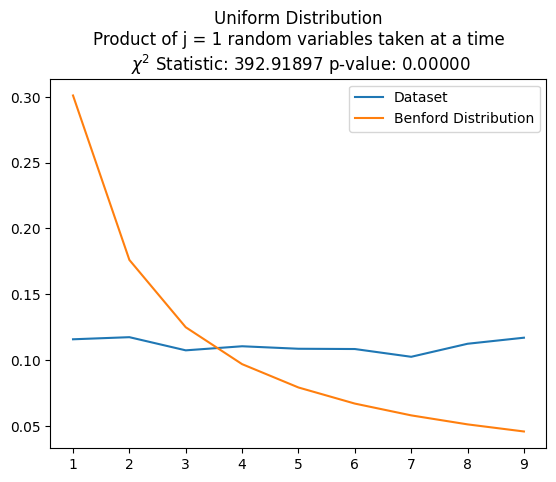

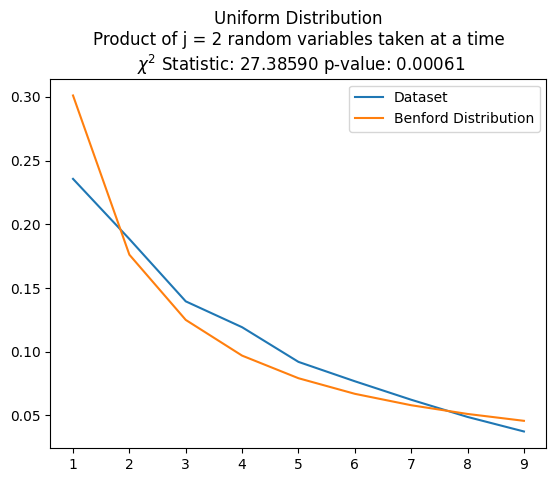

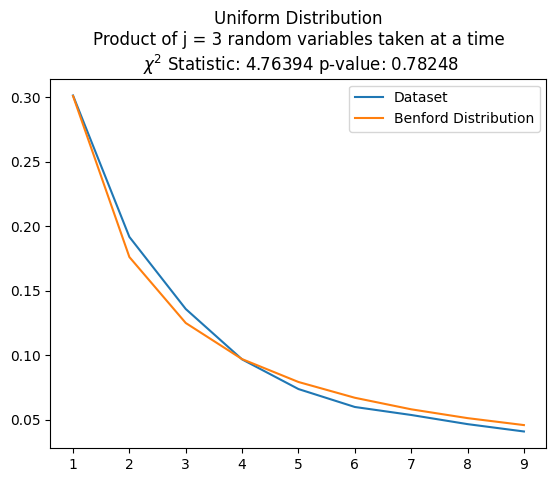

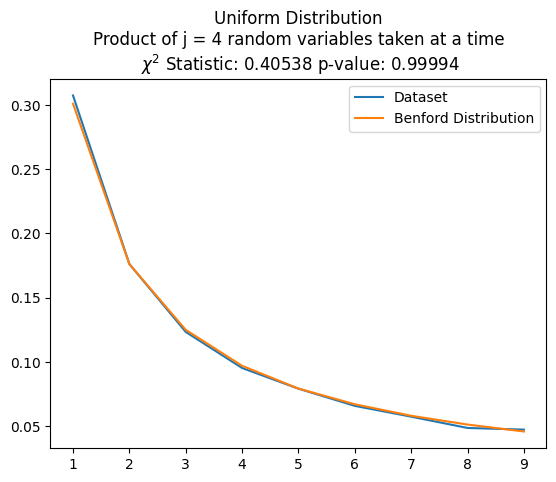

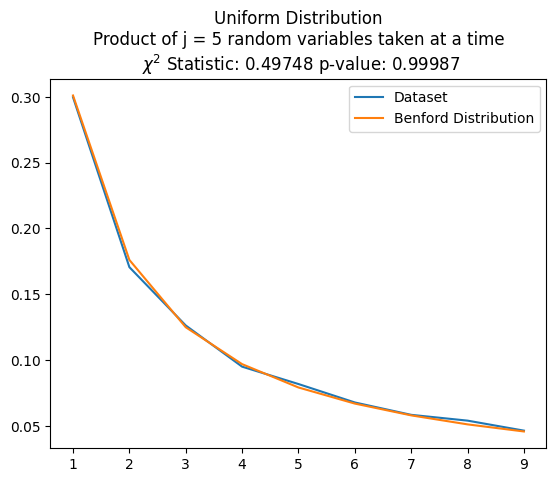

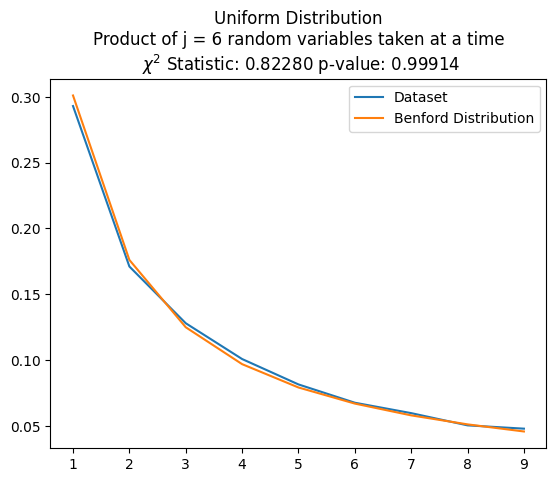

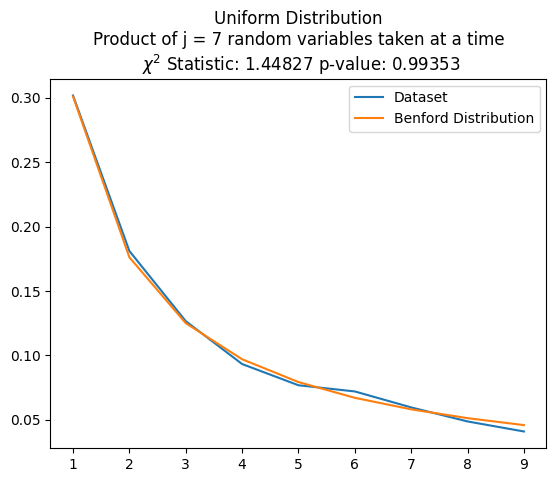

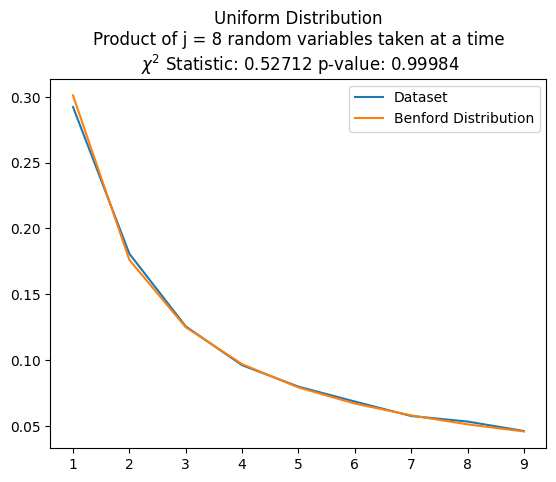

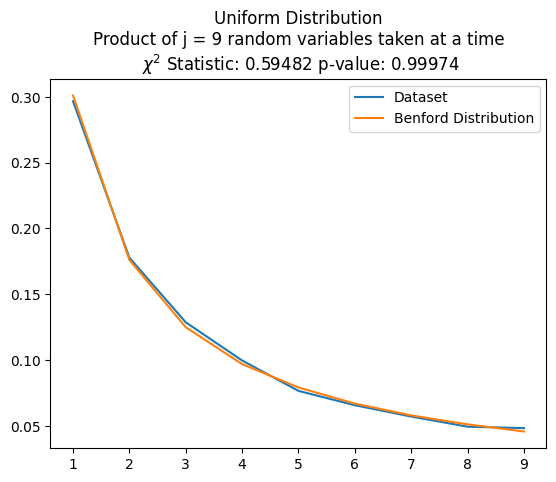

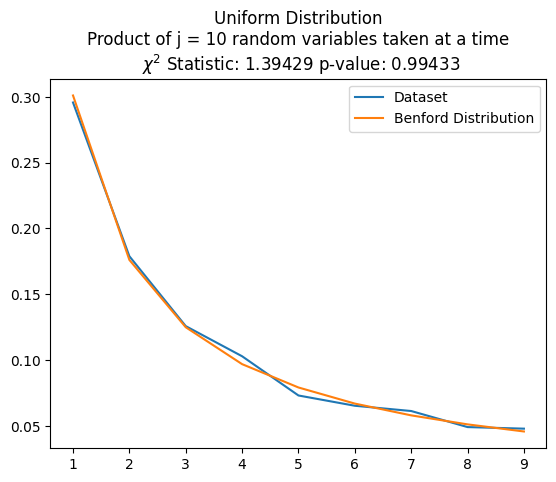

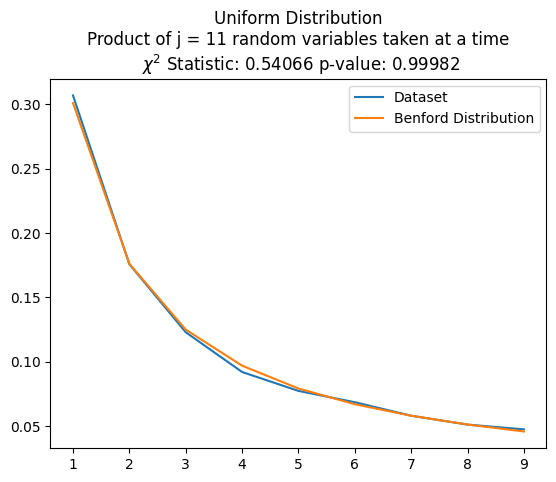

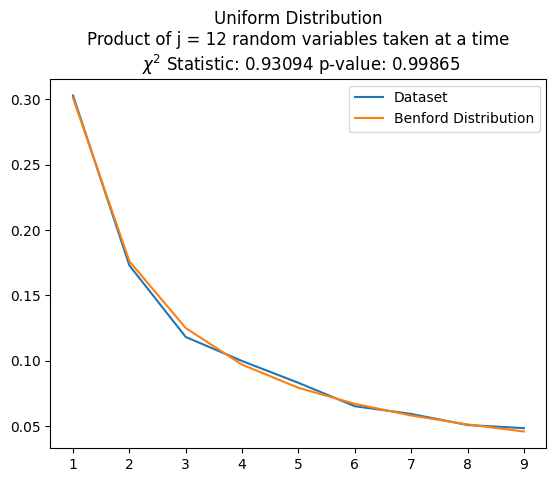

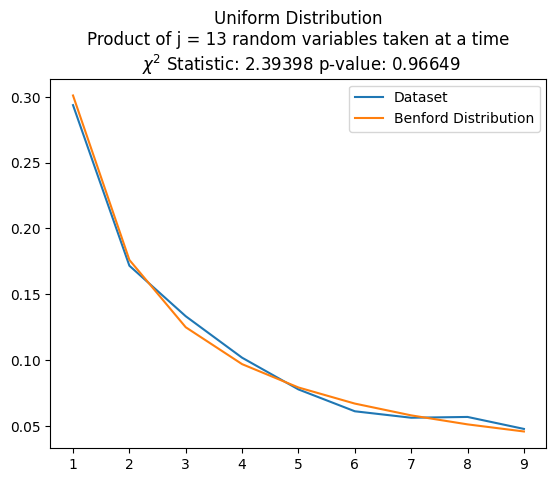

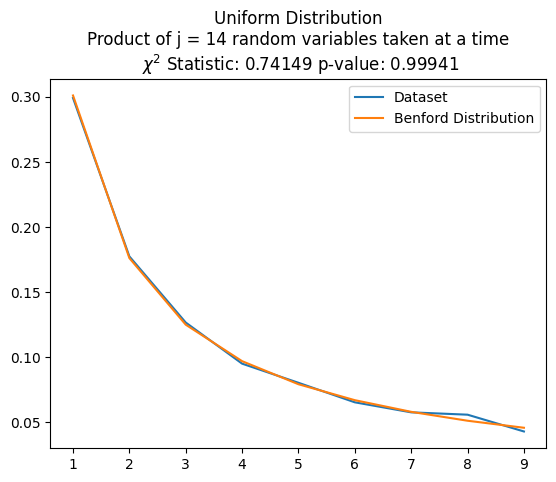

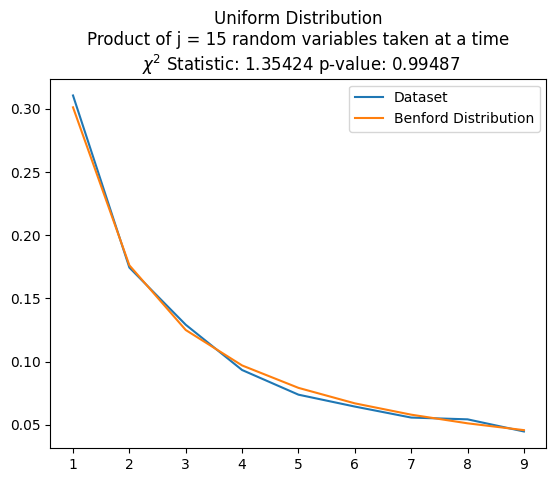

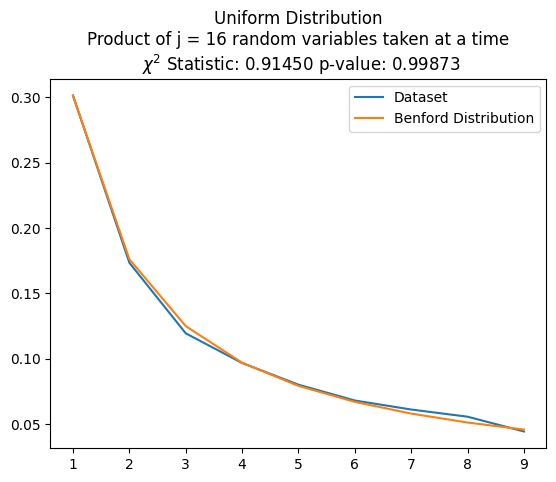

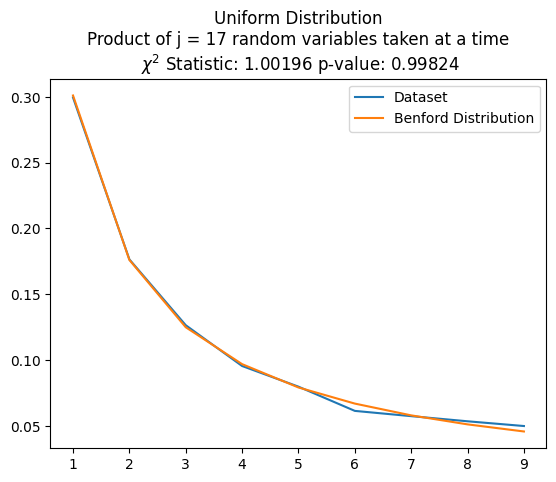

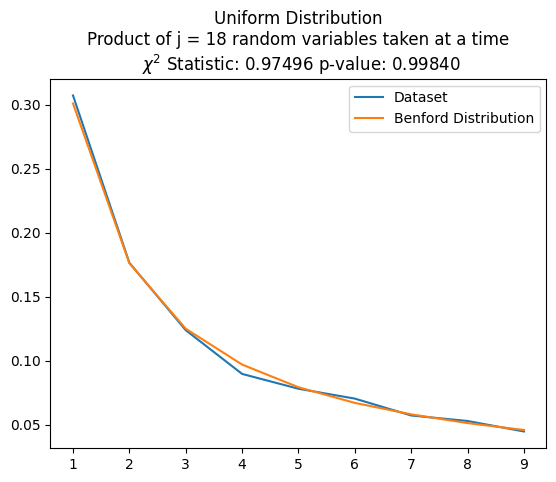

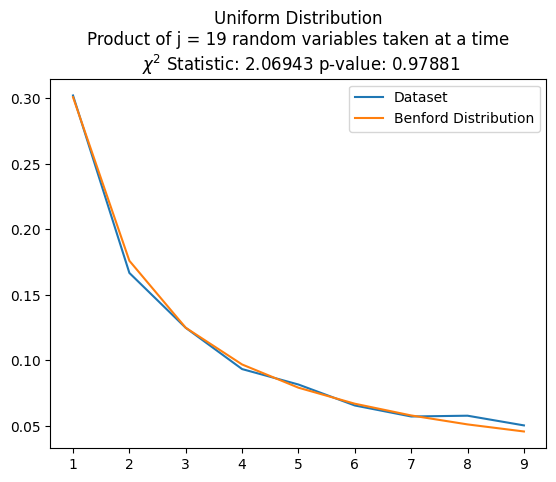

In [75]:
arr_gen_prod = 1
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 10000, 10000)
    # arr_gen = np.random.normal(loc, scale, 10000)
    arr_gen = np.random.uniform(-1e3, 1e6, 10000)
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.multiply(arr_gen, arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Uniform Distribution', fntype='Product')

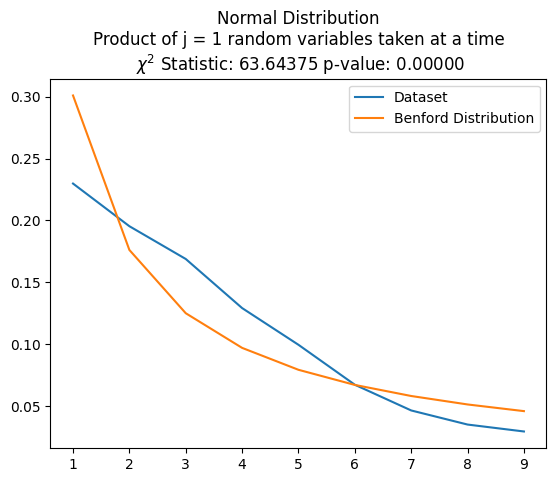

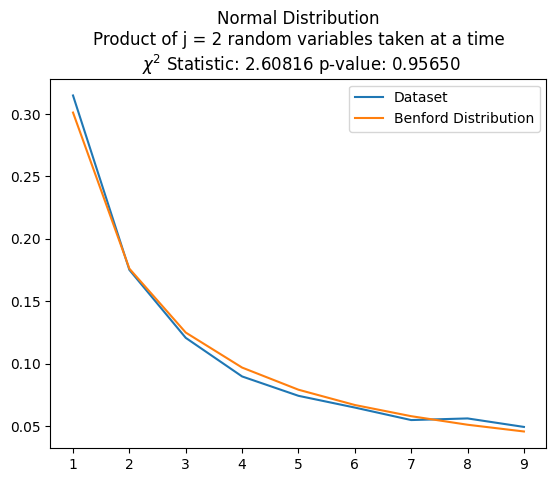

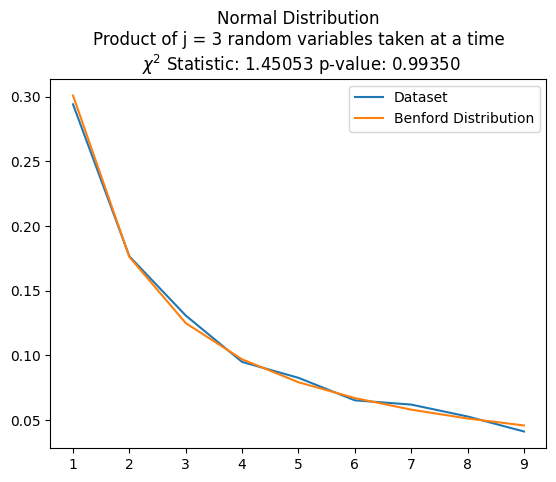

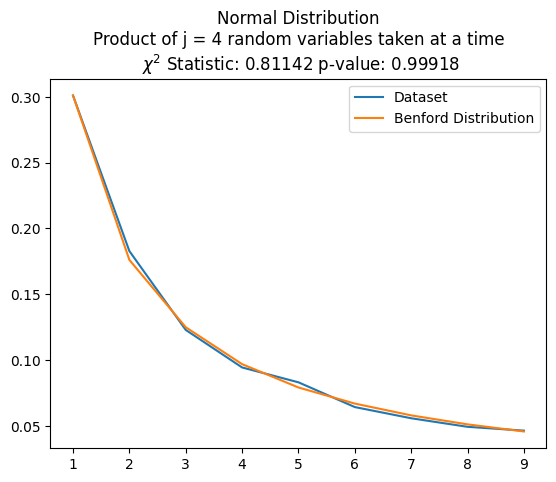

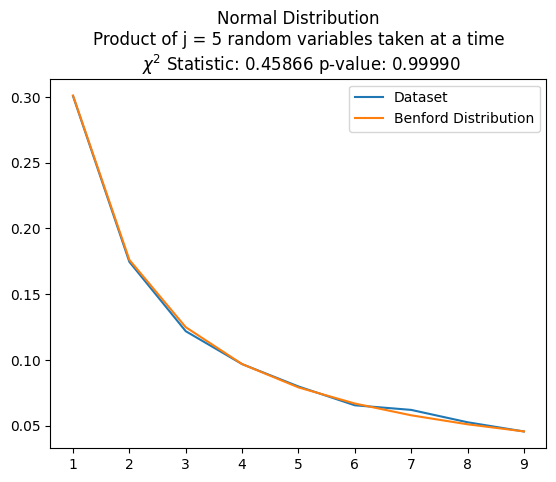

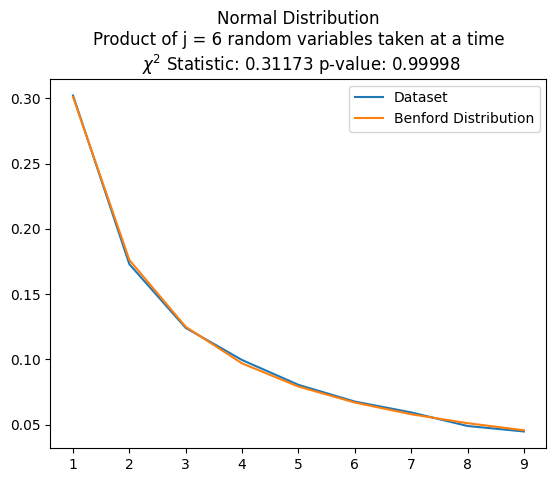

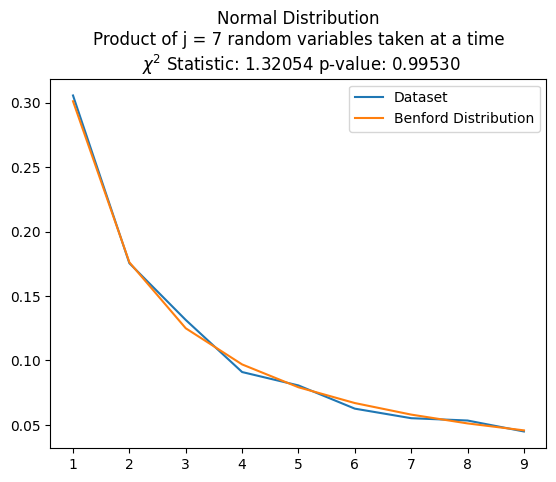

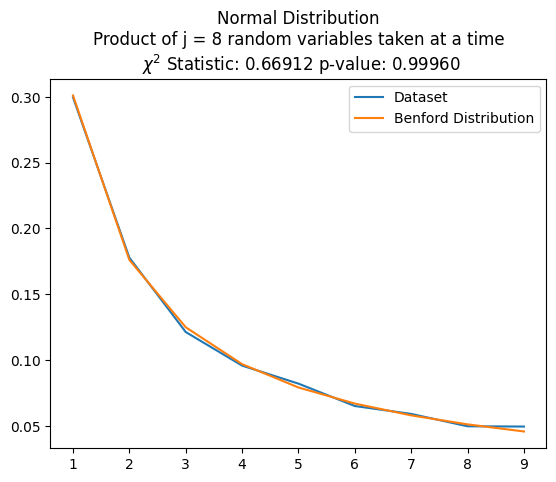

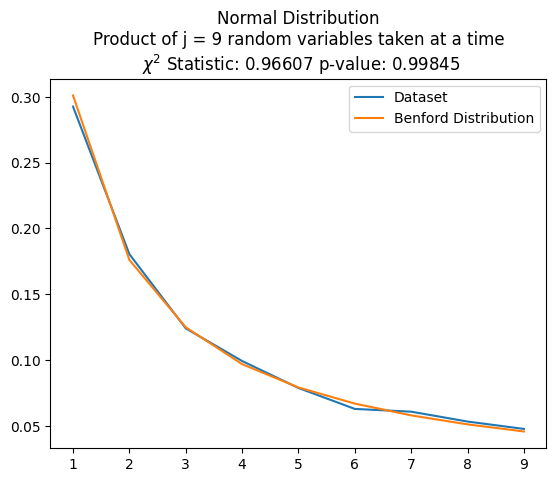

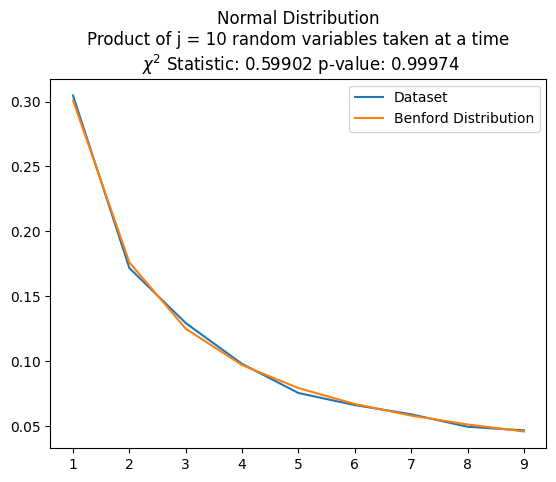

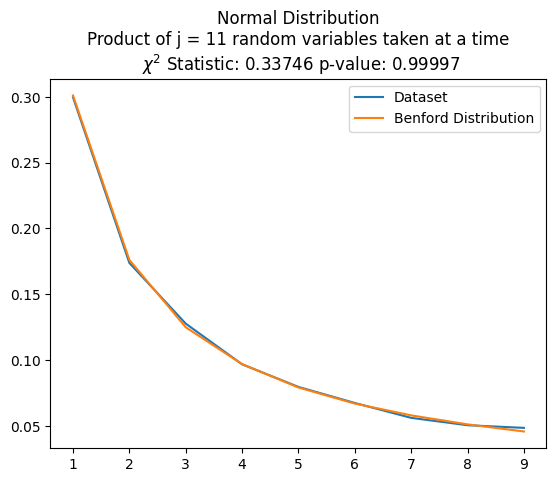

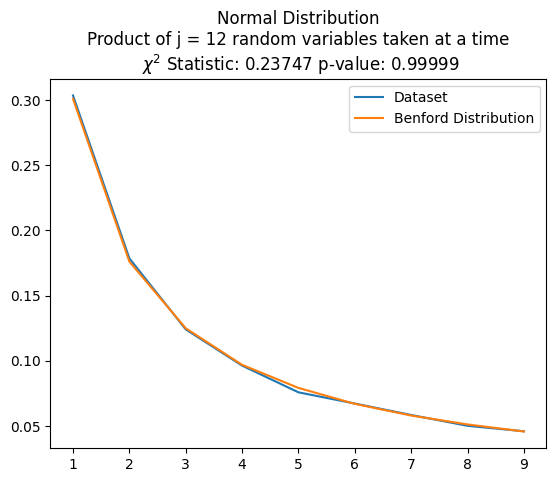

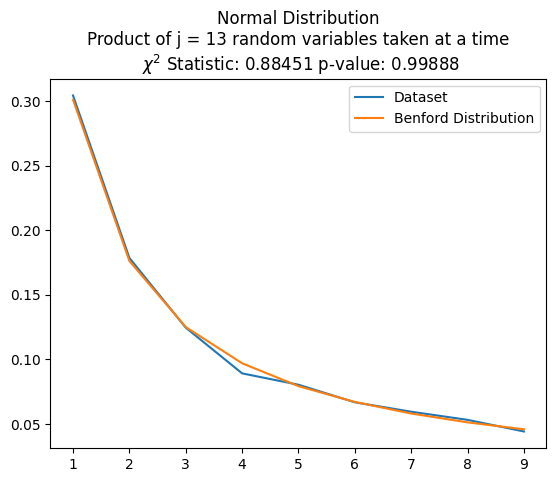

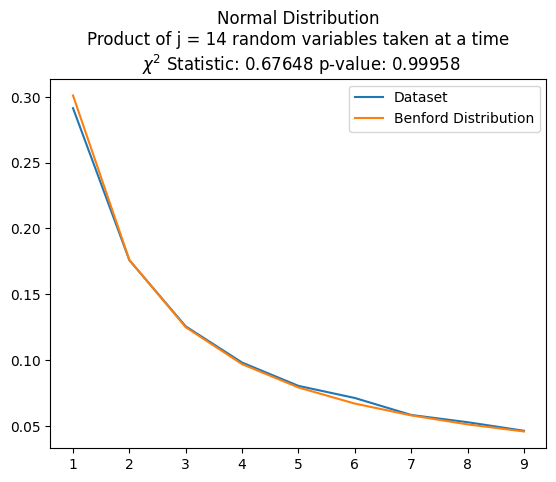

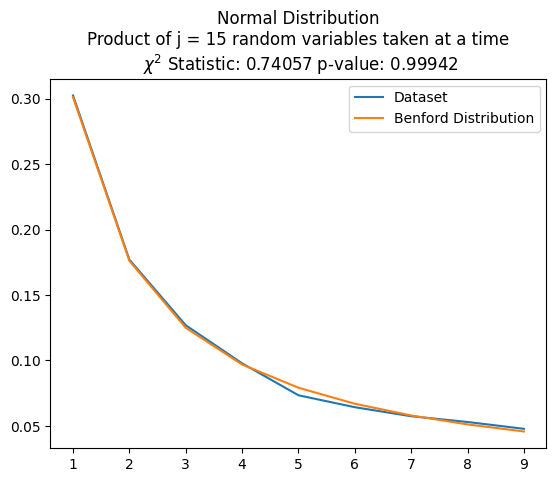

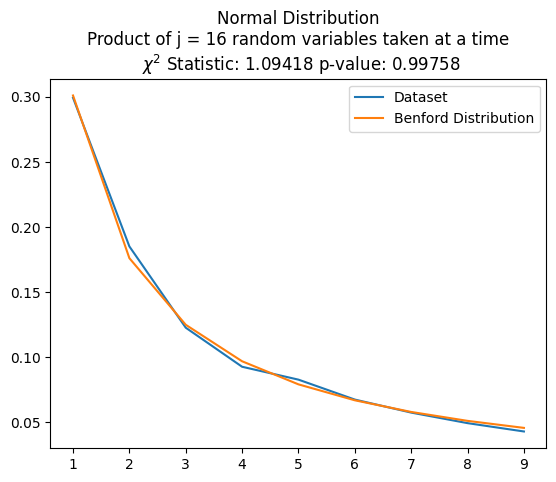

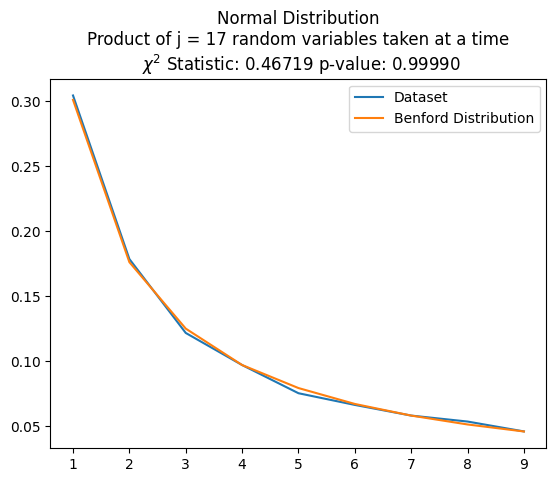

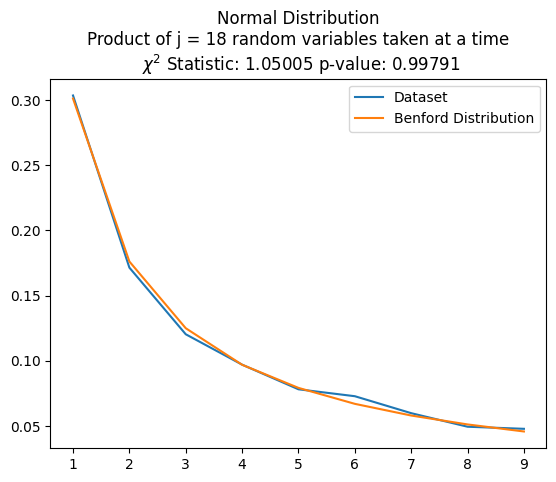

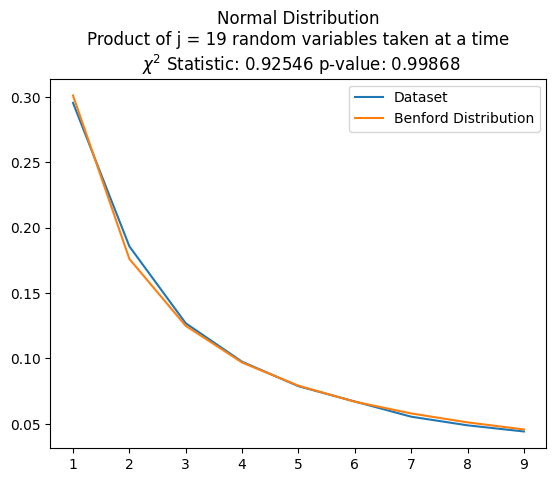

In [76]:
arr_gen_prod = 1
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 10000, 10000)
    arr_gen = np.random.normal(loc, scale, 10000)
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.multiply(arr_gen, arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Normal Distribution', fntype='Product')

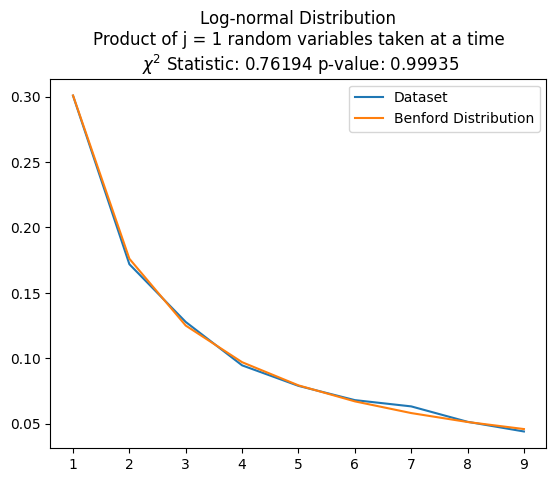

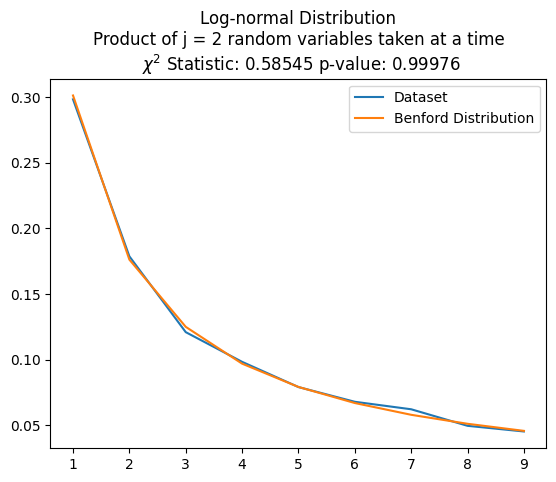

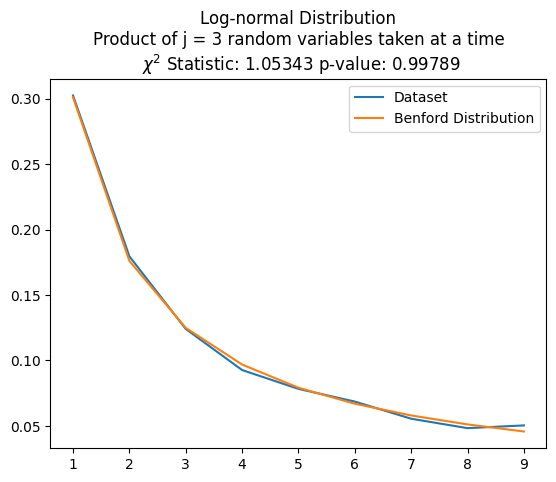

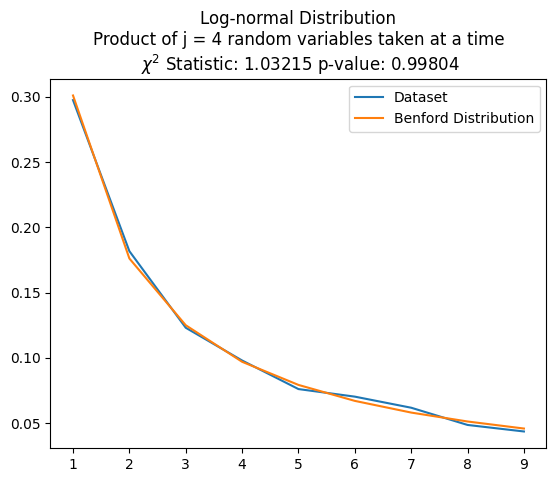

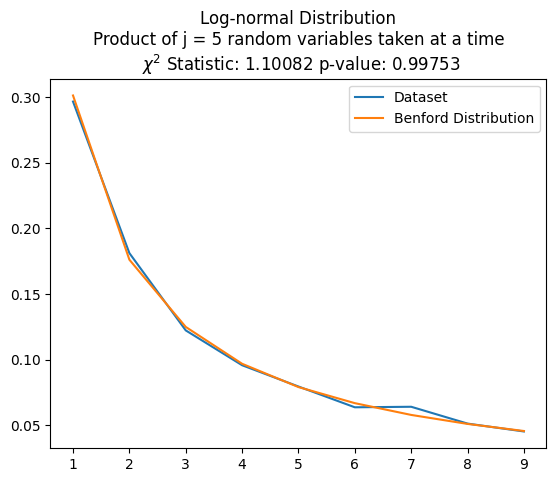

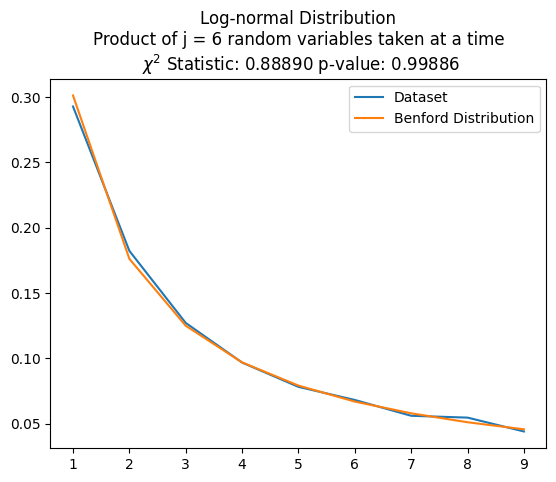

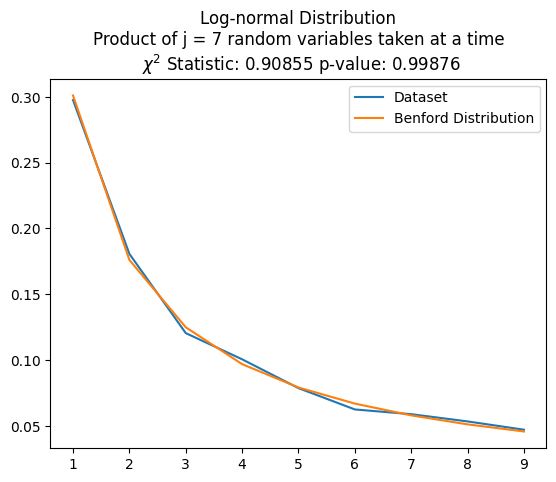

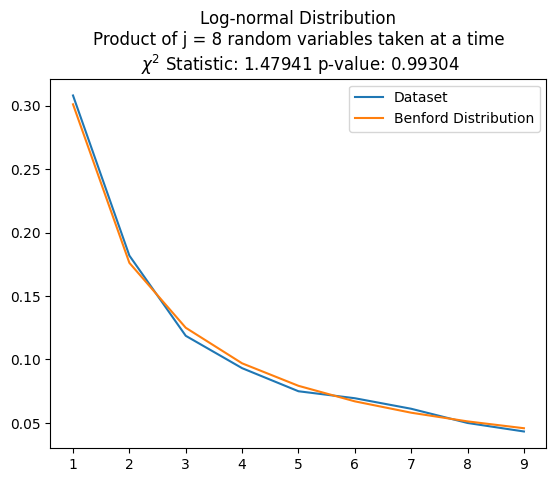

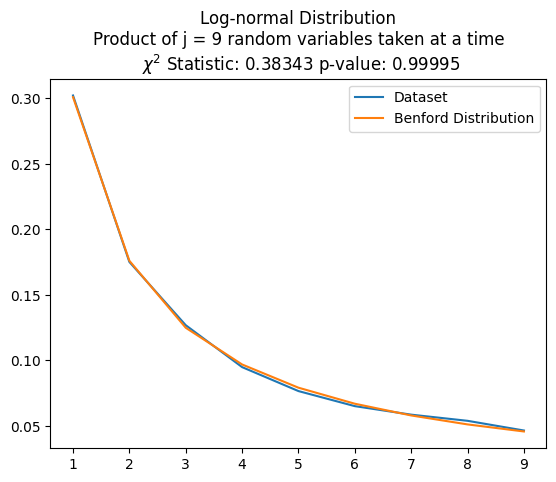

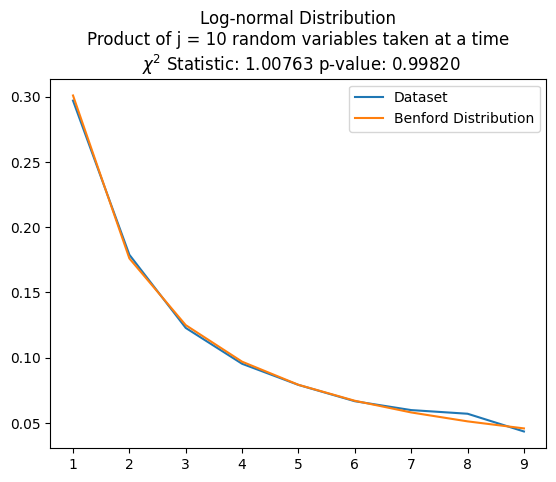

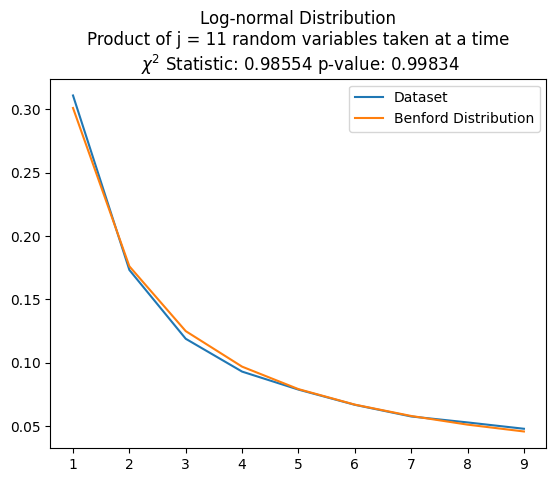

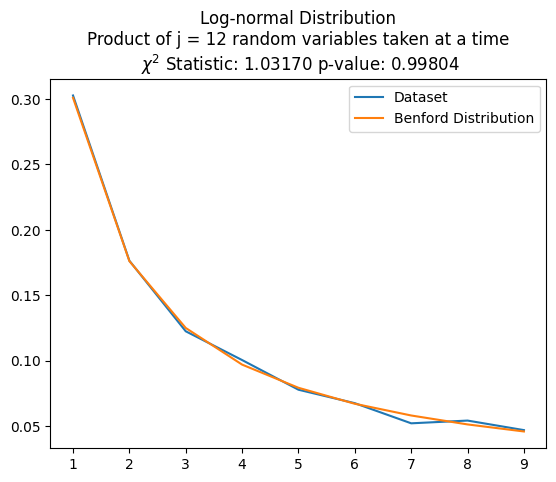

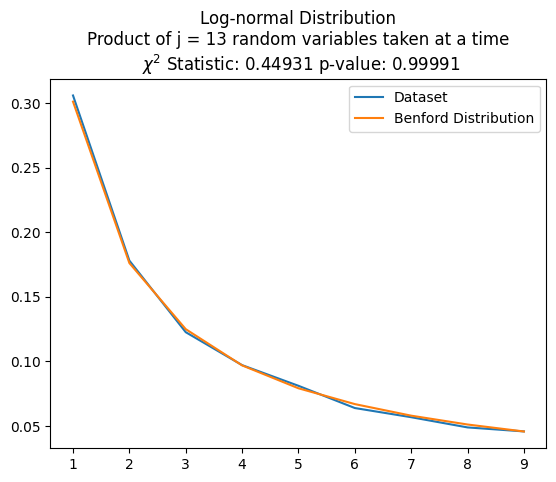

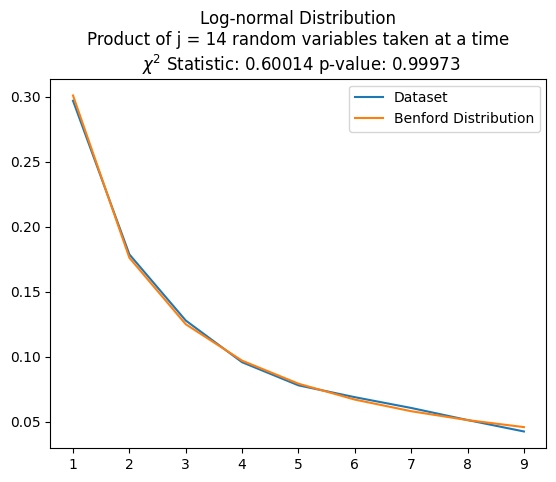

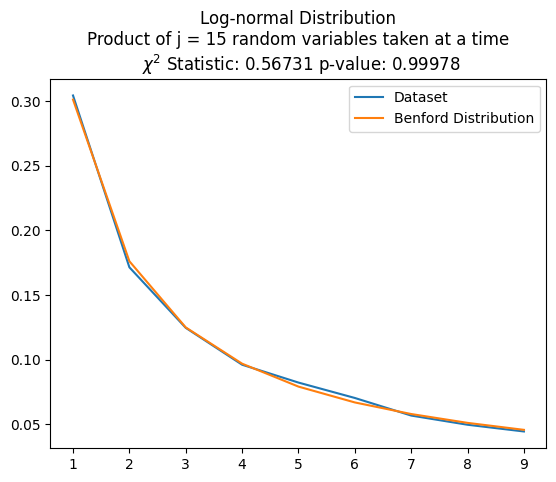

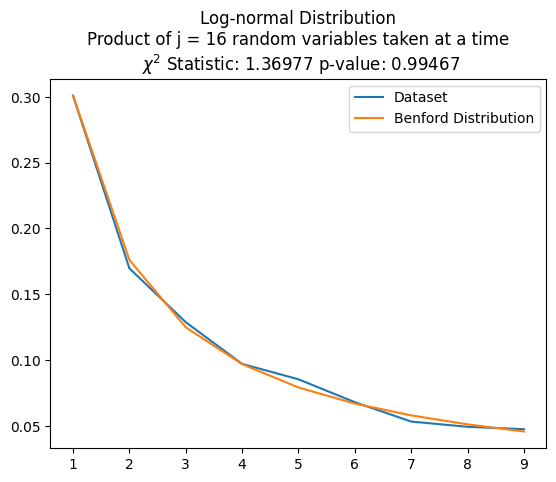

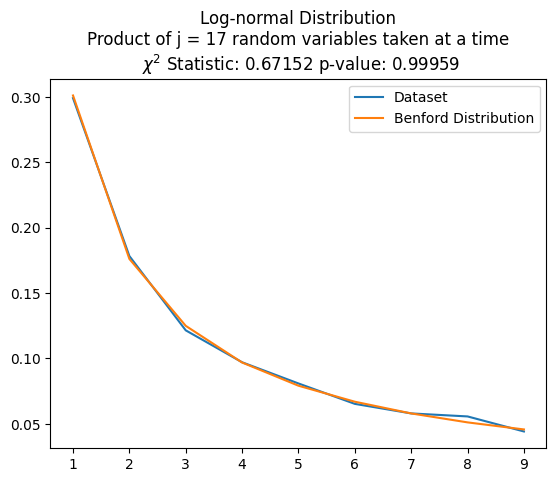

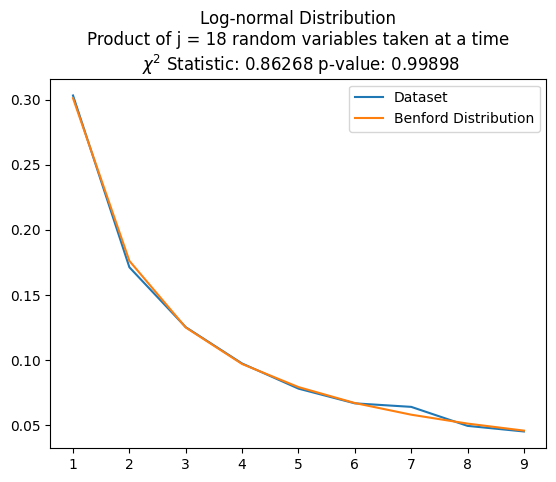

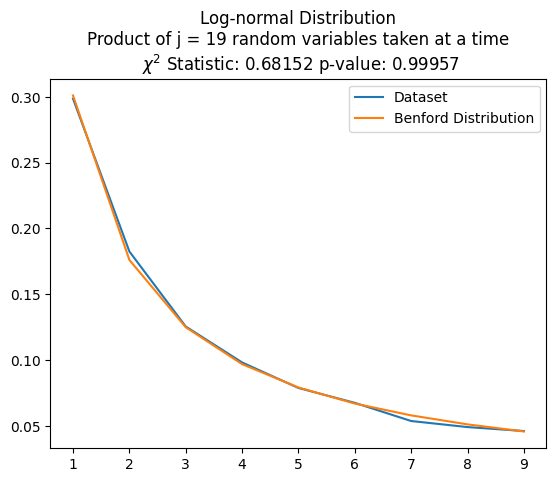

In [77]:
#PRODUCT OF LOGNORMAL DISTRIBUTION
arr_gen_prod = 1
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 10000, 10000)
    # arr_gen = np.random.normal(loc, scale, 10000)
    arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.multiply(arr_gen, arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Log-normal Distribution', fntype='Product')

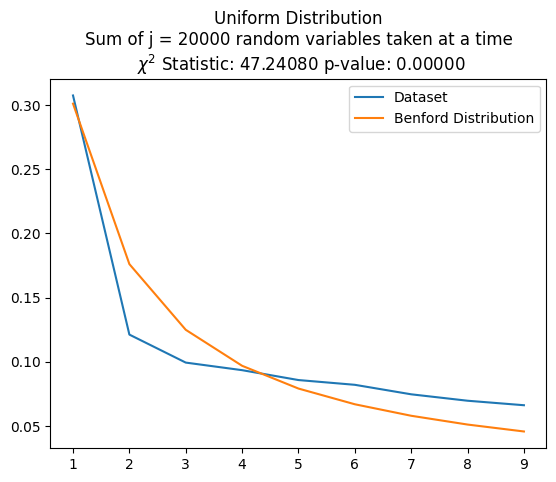

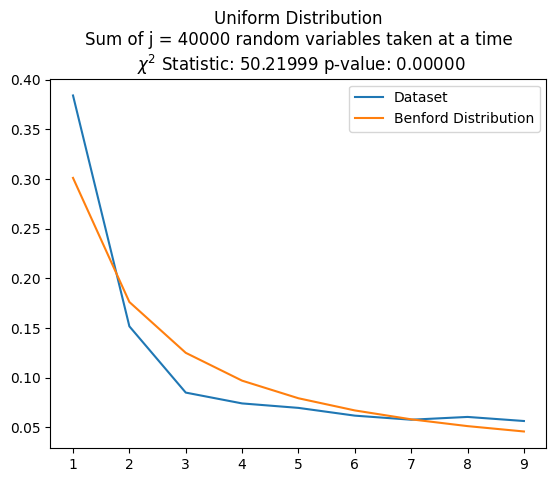

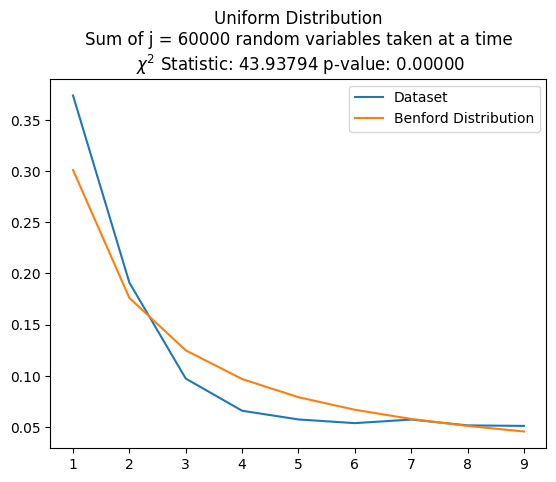

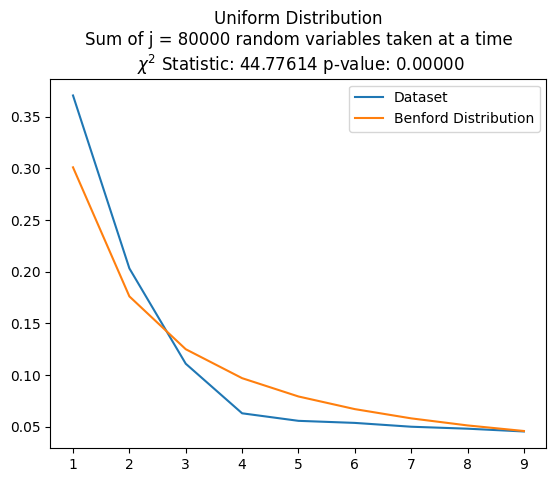

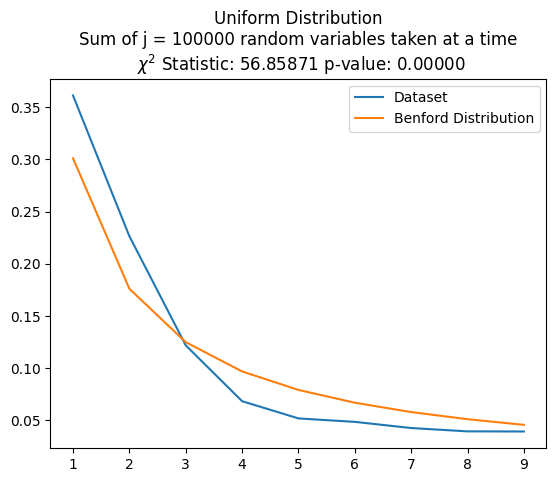

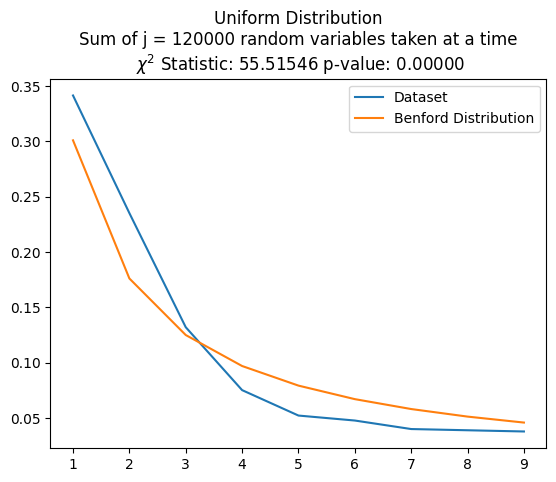

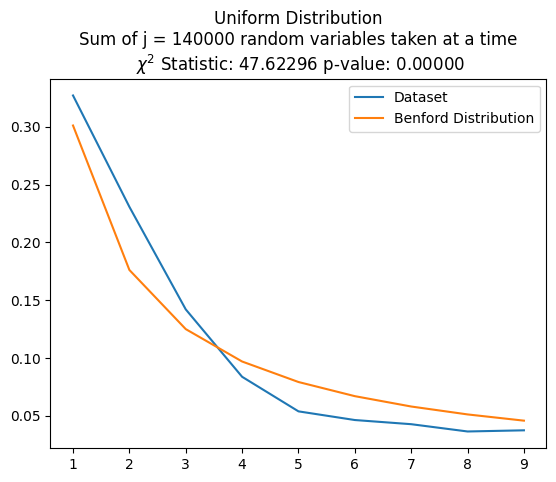

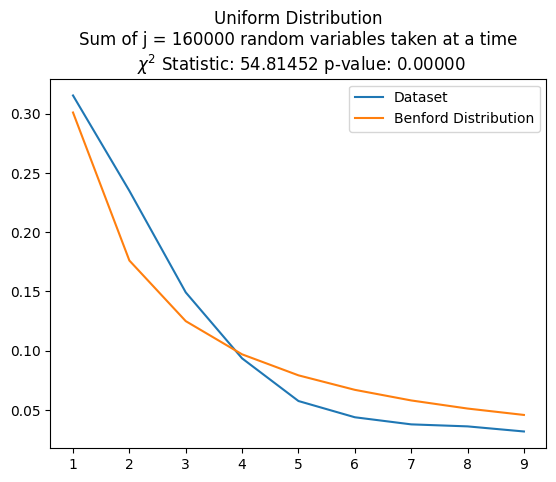

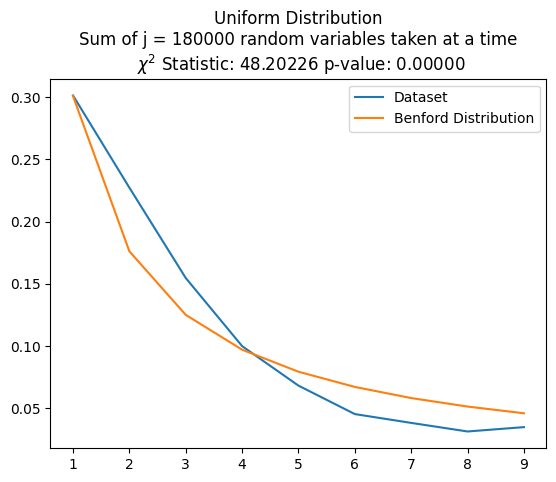

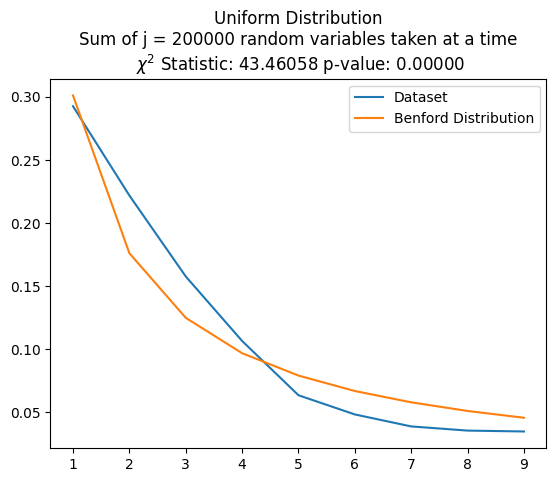

In [78]:
arr_gen_prod = 0
for i in range(1, 200001):
    # arr_gen = np.random.randint(1, 10000, 10000)
    arr_gen = np.random.uniform(-1e6, 1e6, 10000)
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.add(arr_gen, arr_gen_prod)
    if i%20000 == 0:
        chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Uniform Distribution', fntype='Sum')

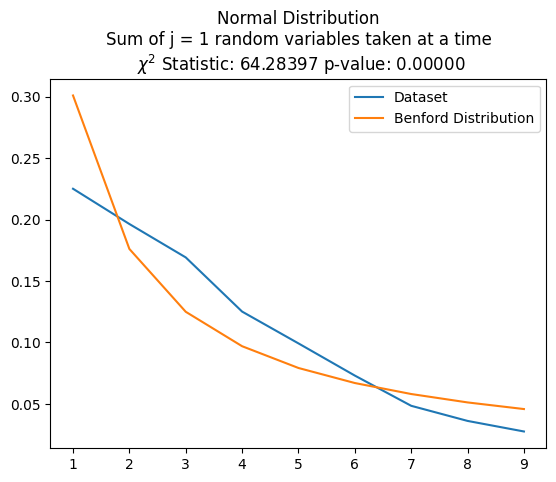

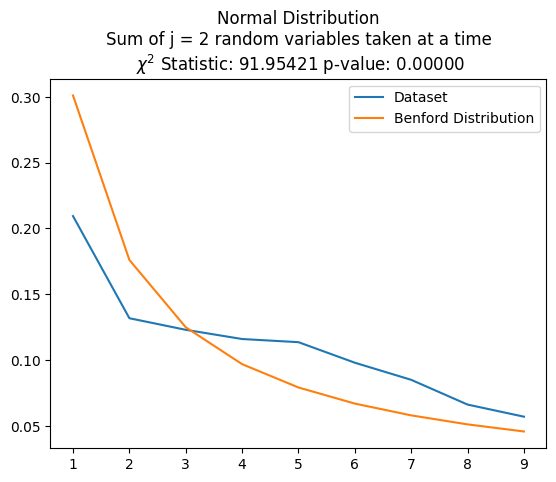

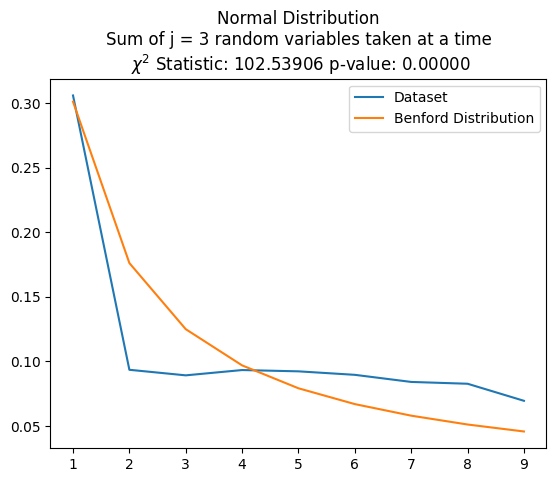

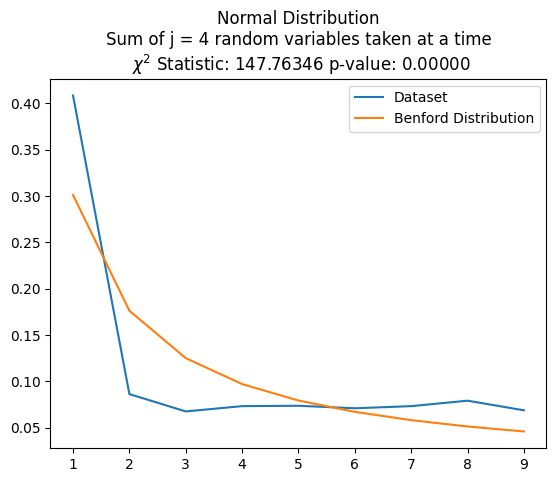

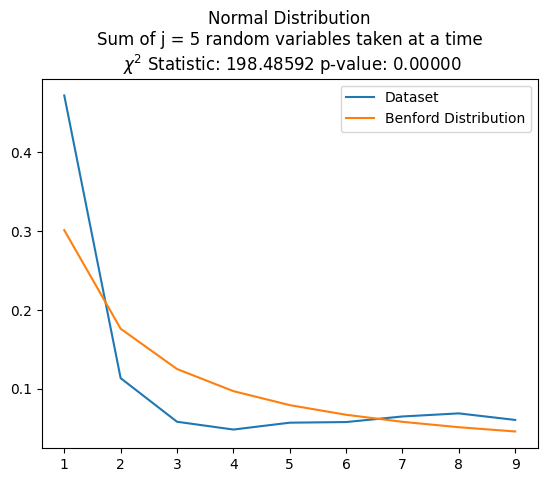

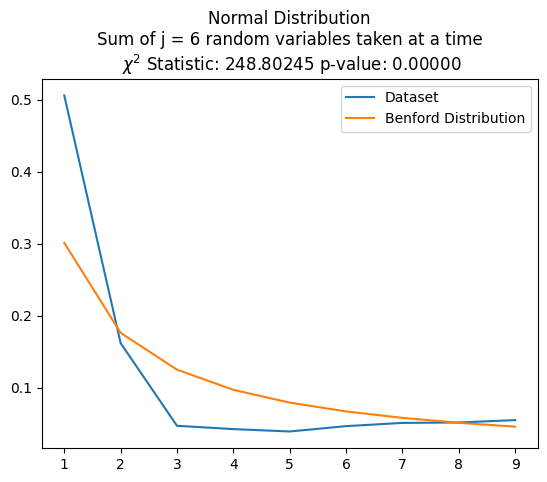

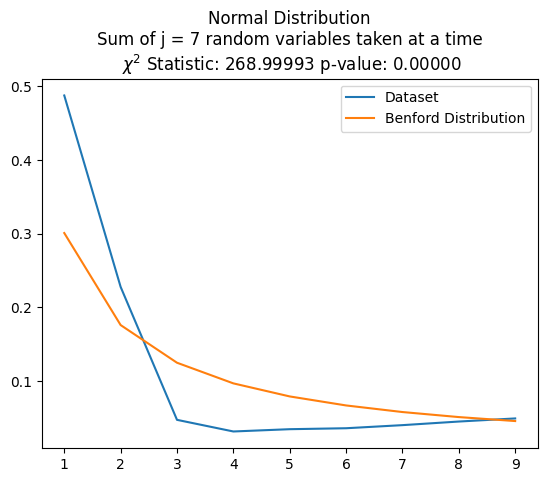

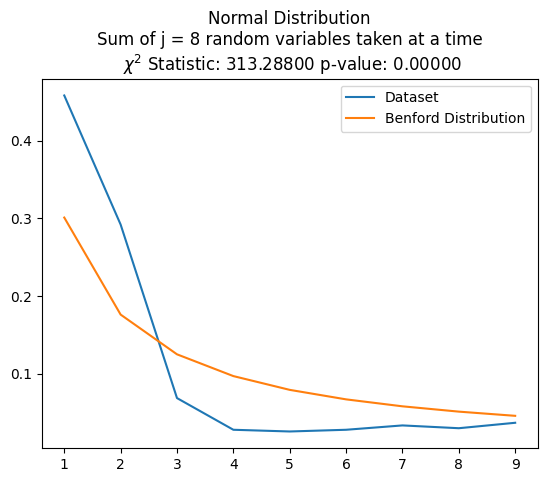

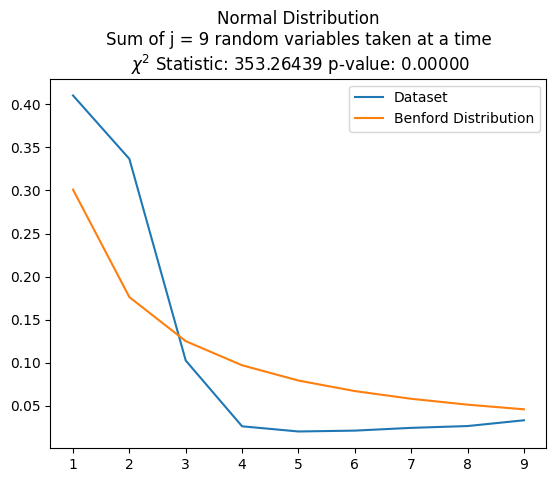

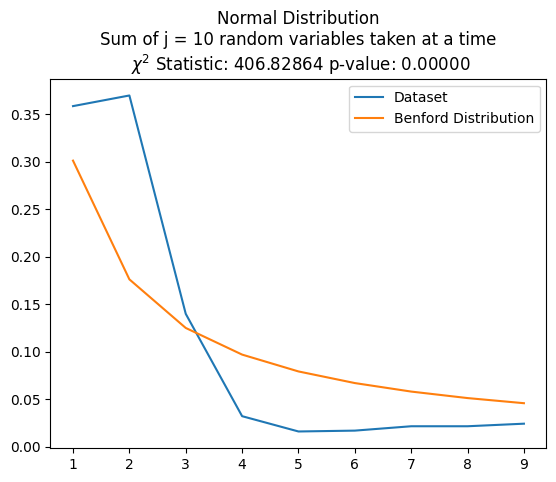

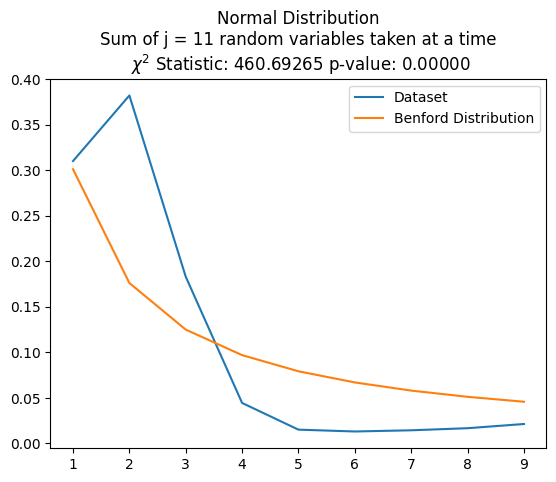

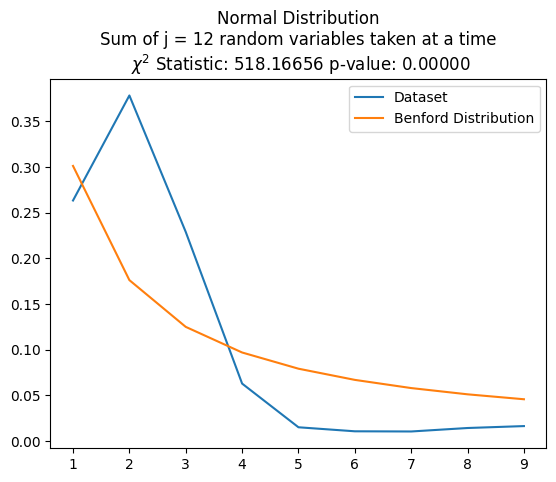

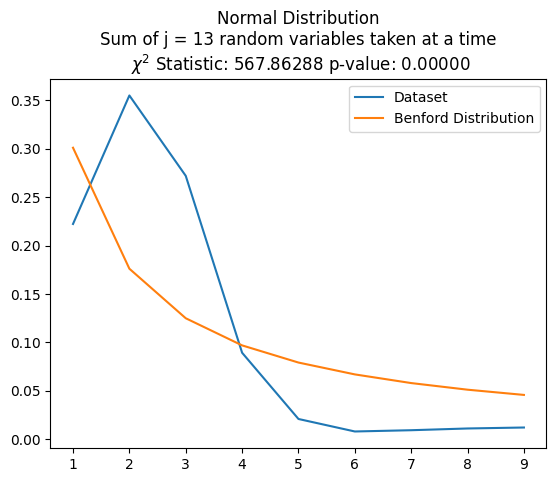

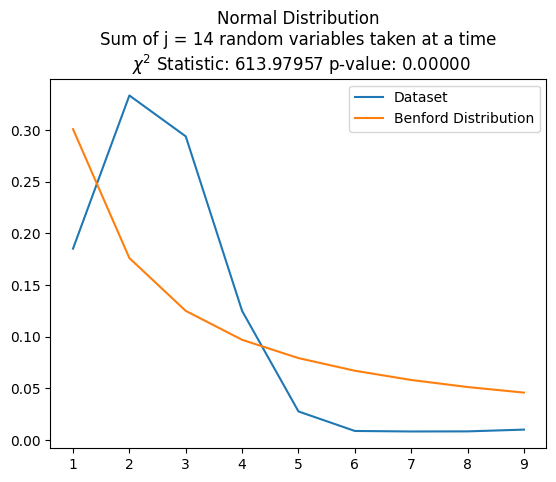

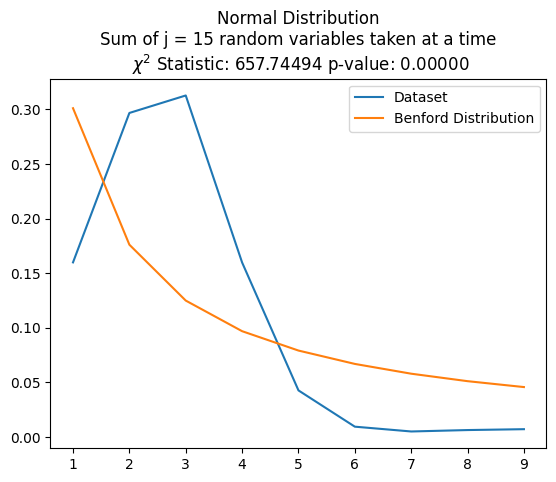

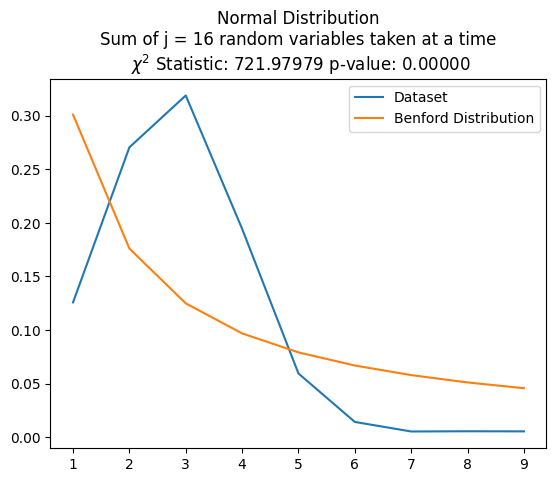

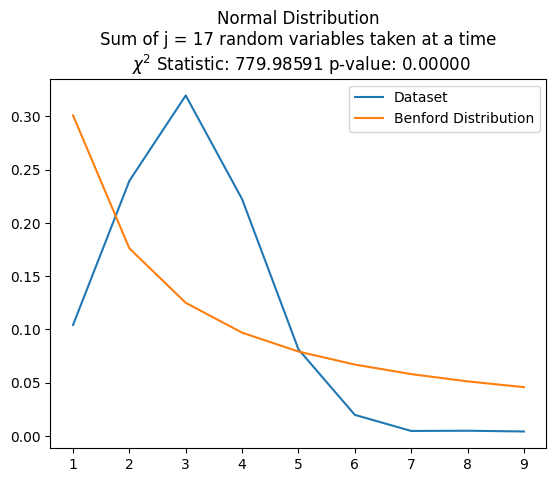

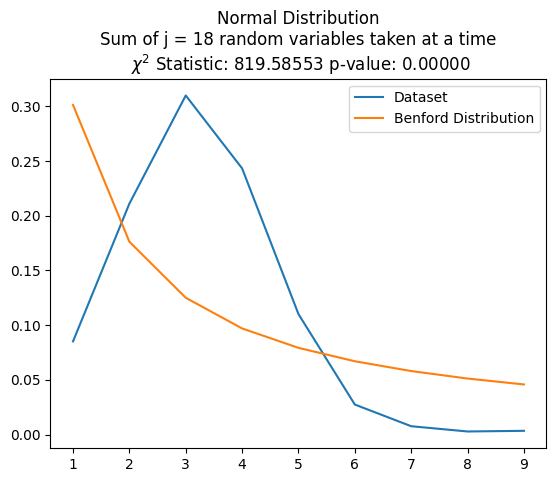

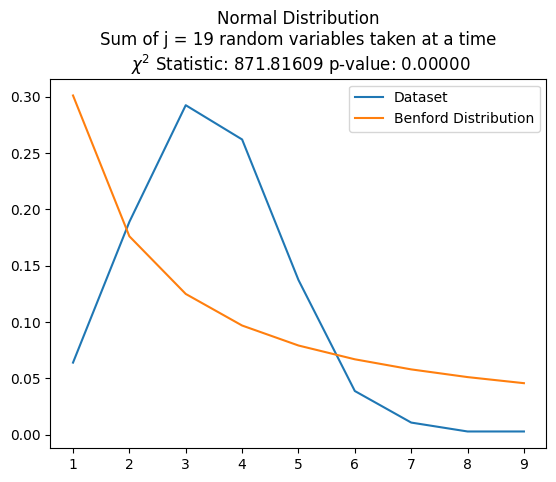

In [79]:
arr_gen_prod = 0
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 10000, 10000)
    arr_gen = np.random.normal(loc, scale,10000)
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.add(arr_gen, arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Normal Distribution', fntype='Sum')

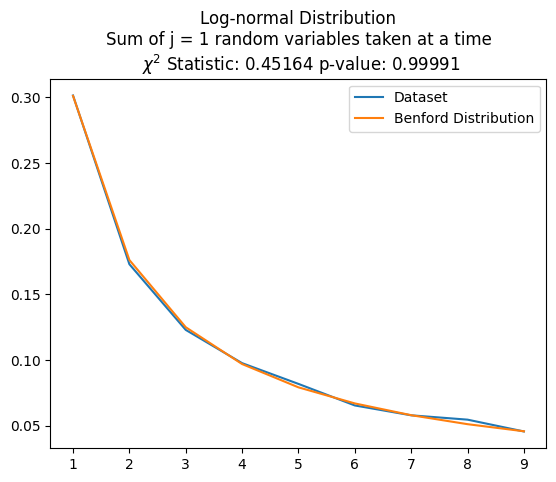

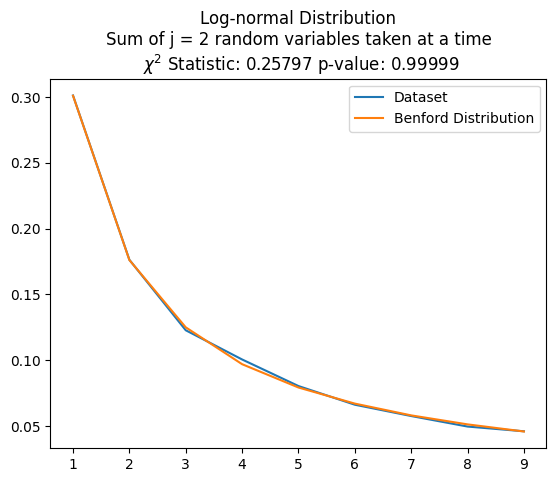

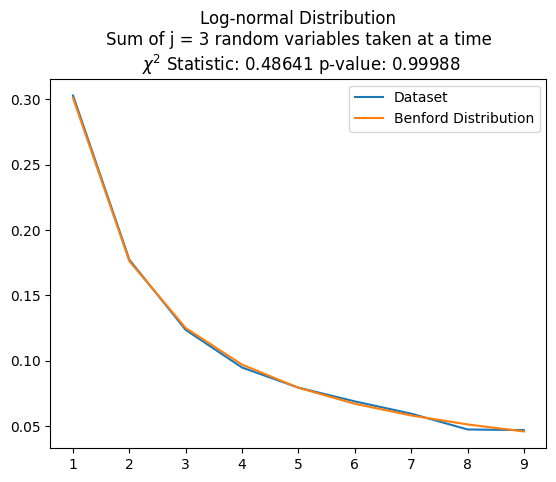

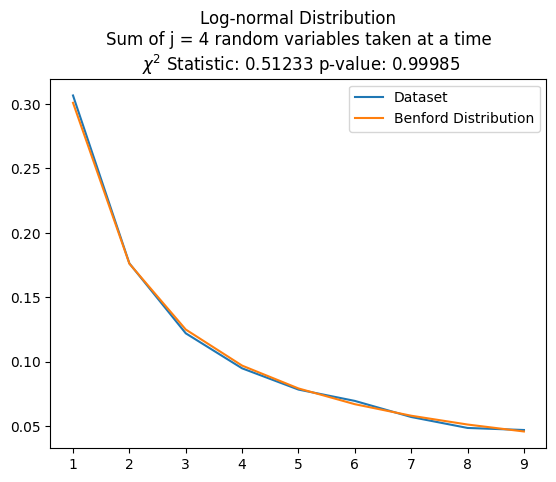

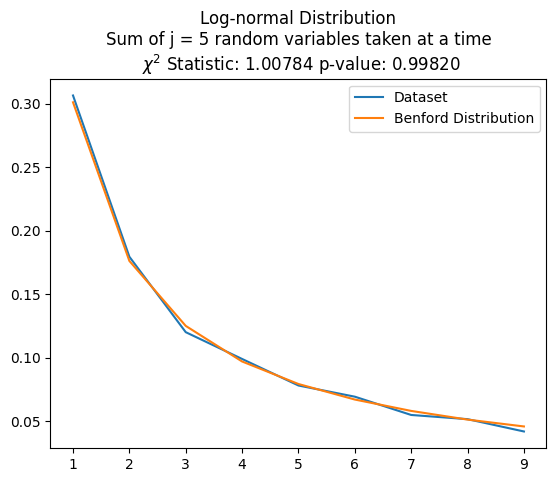

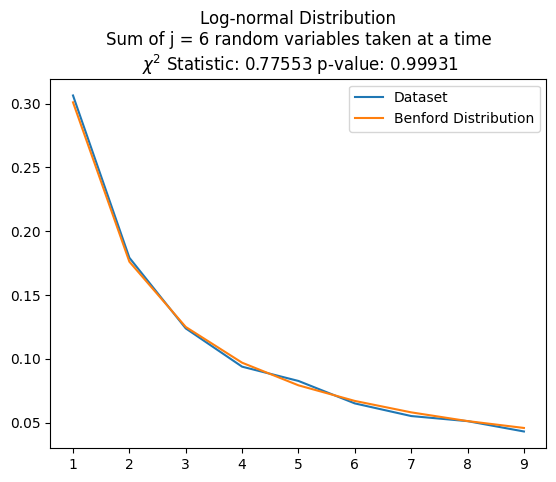

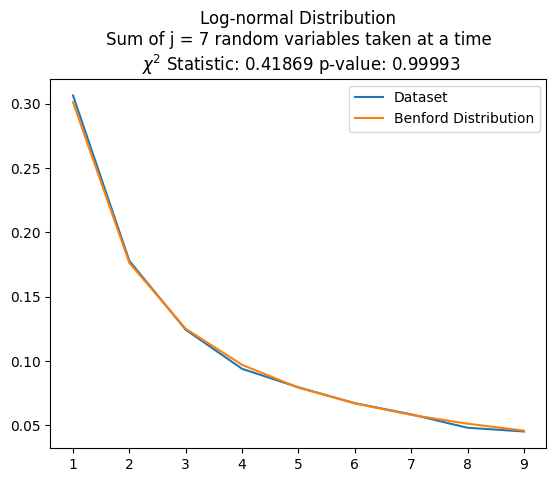

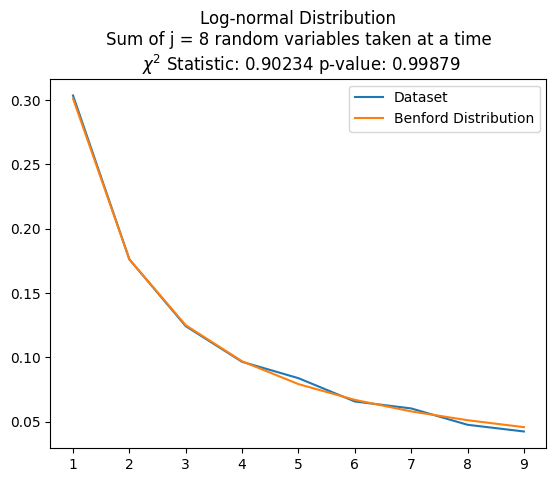

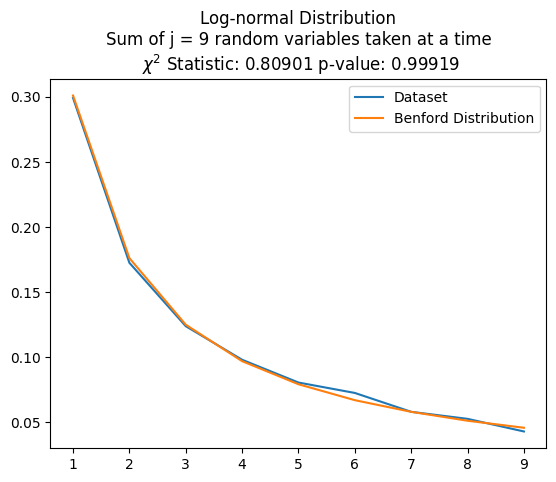

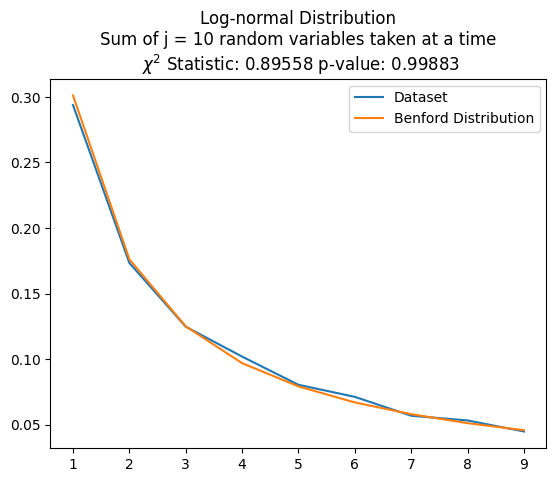

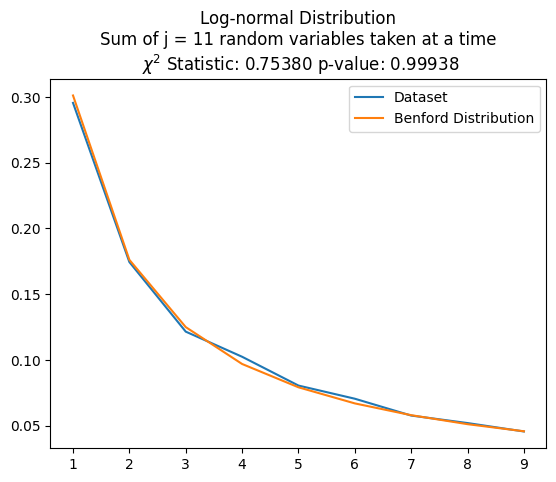

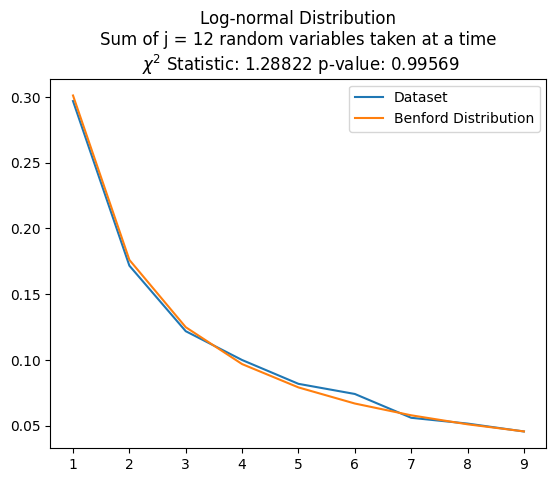

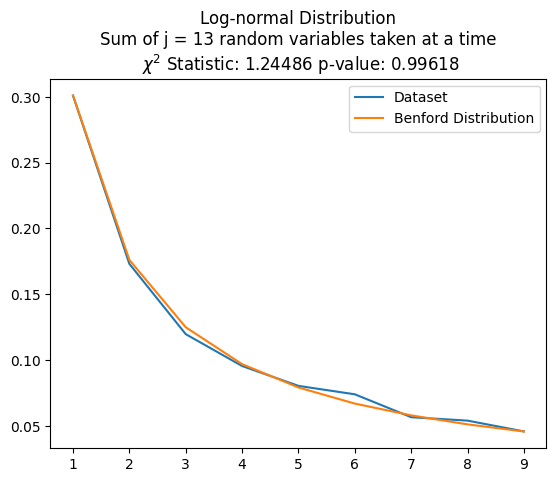

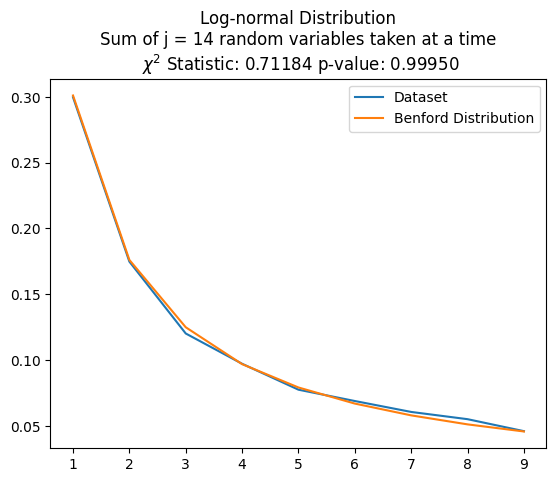

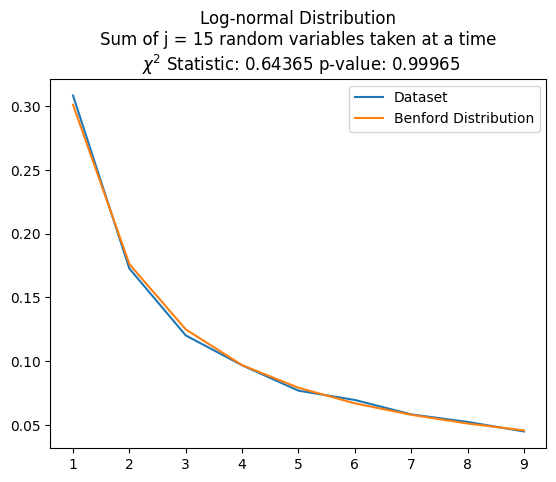

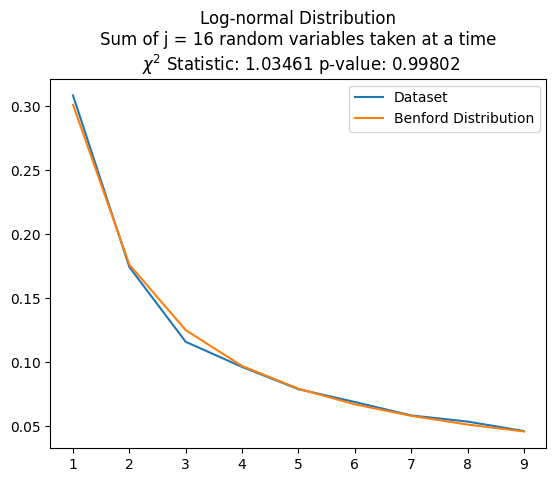

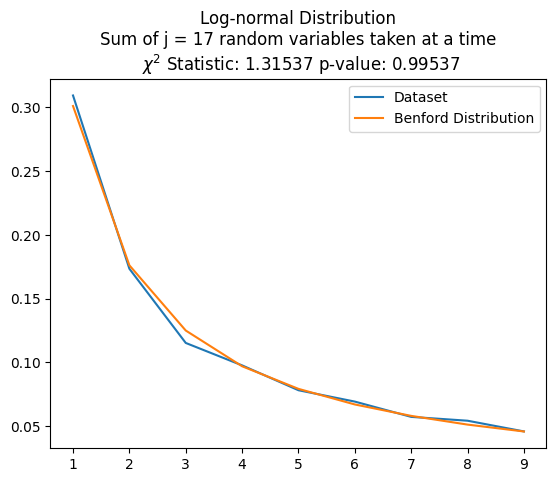

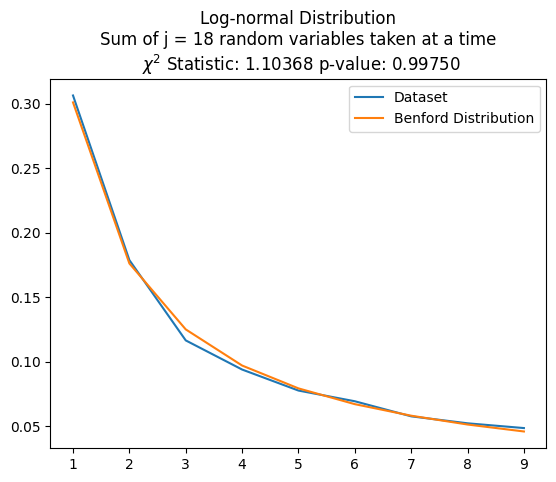

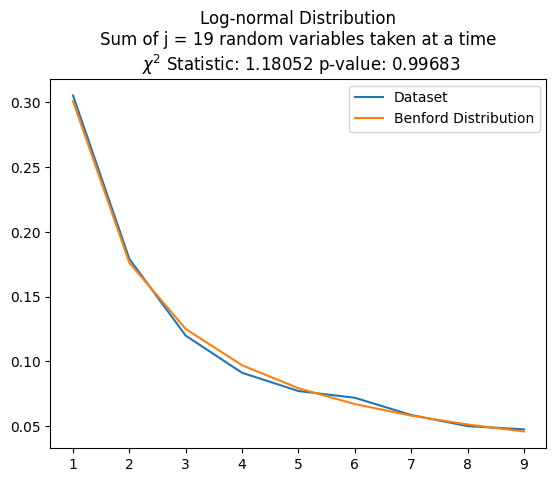

In [80]:
arr_gen_prod = 0
for i in range(1, 20):
    # arr_gen = np.random.randint(1, 10000, 10000)
    # arr_gen = np.random.uniform(-1e6, 1e6, 10000)
    arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.add(arr_gen, arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle='Log-normal Distribution', fntype='Sum')

## SINE

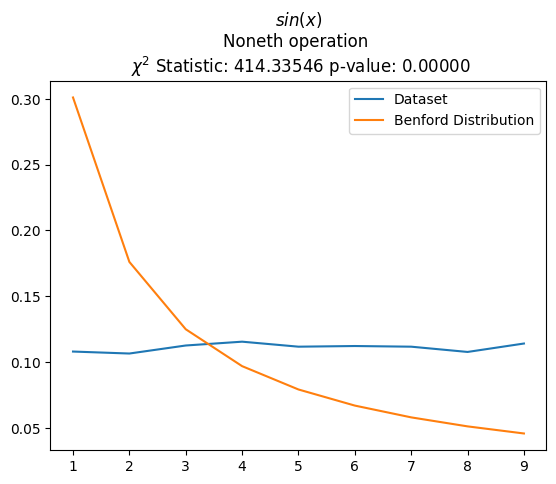

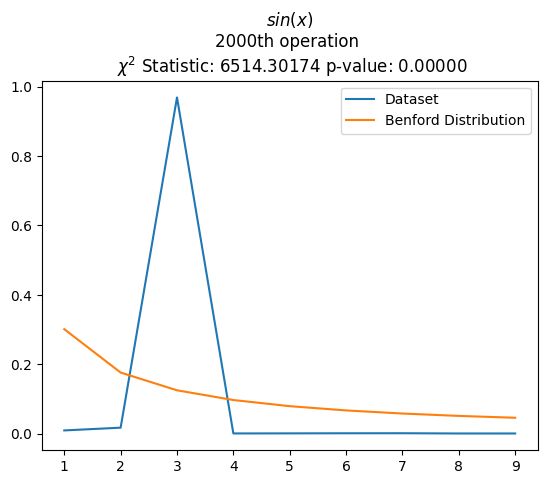

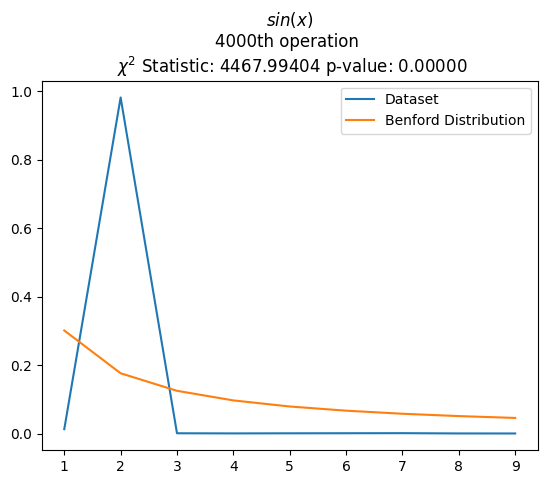

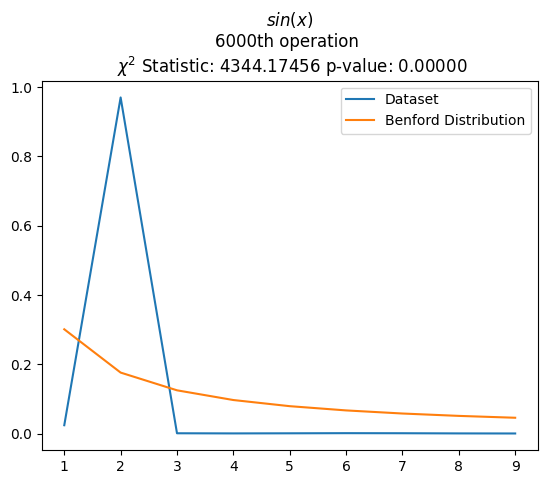

In [82]:
arr_gen_prod = np.random.uniform(1e-3, 1e6, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$sin (x)$')
for i in range(1, 6001):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.sin(arr_gen_prod)
    if i%2000 == 0:
        chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$sin (x)$')

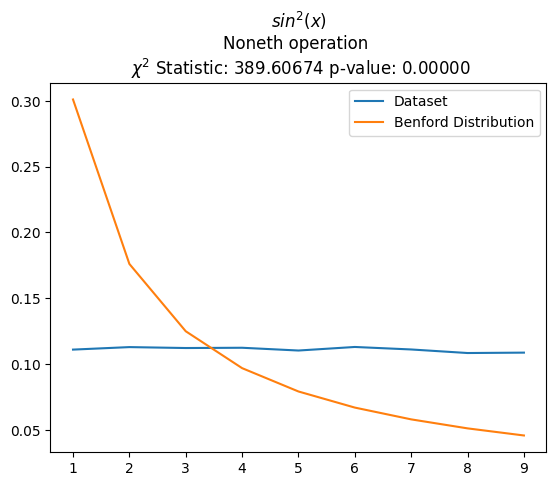

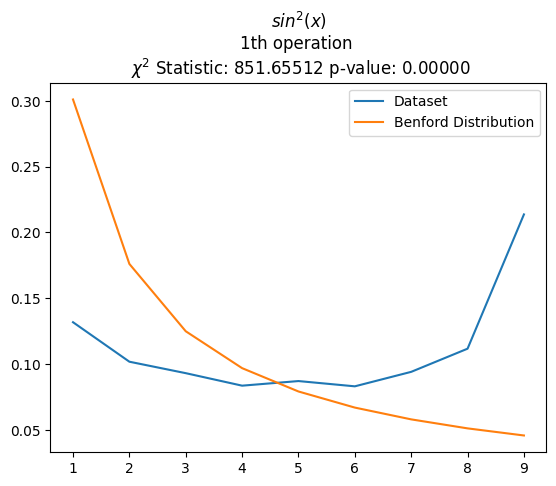

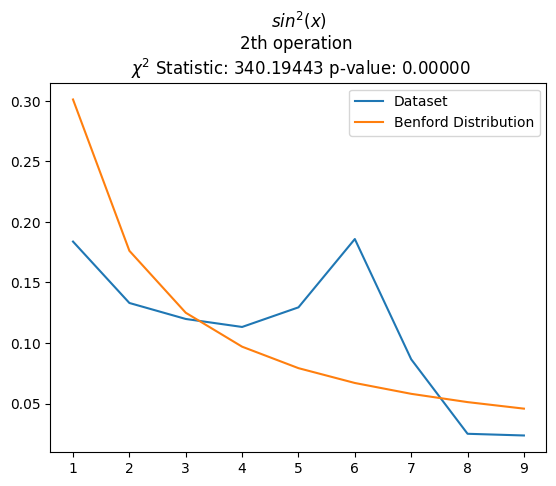

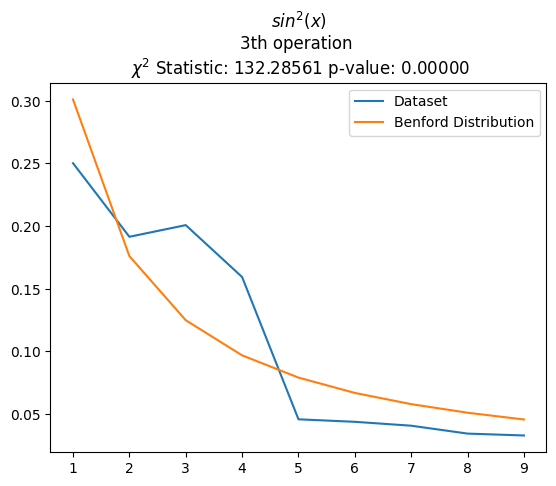

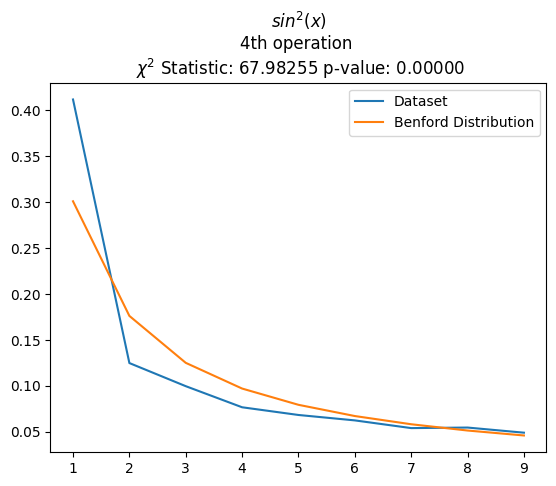

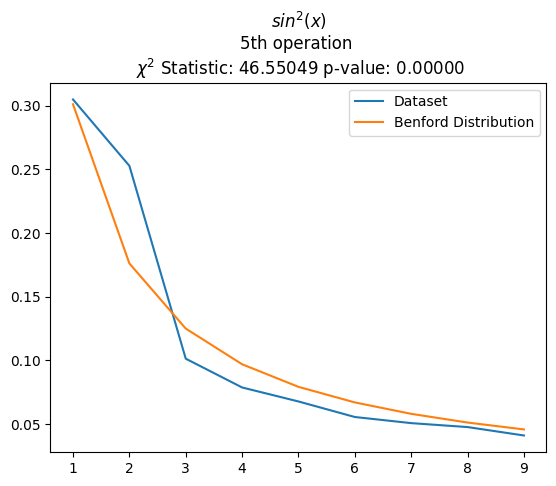

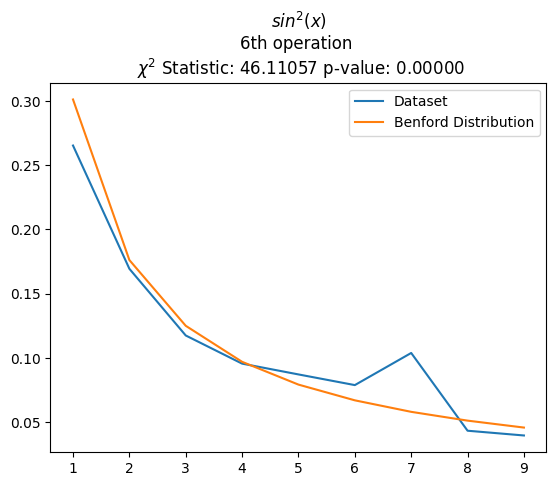

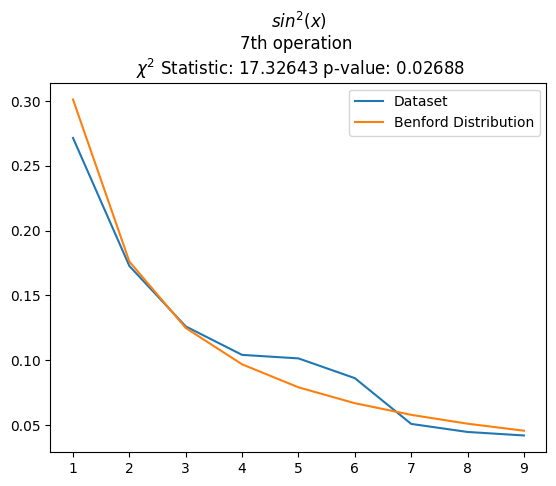

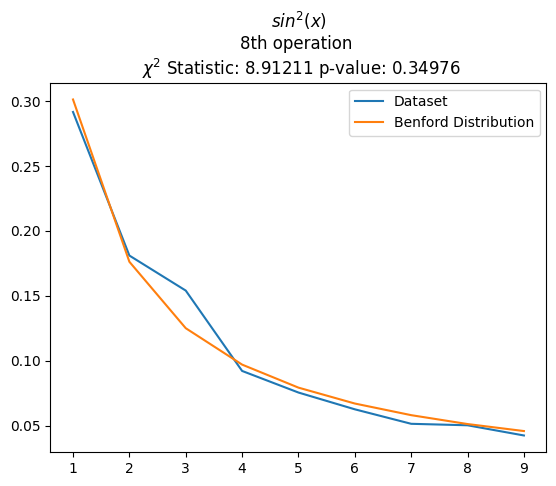

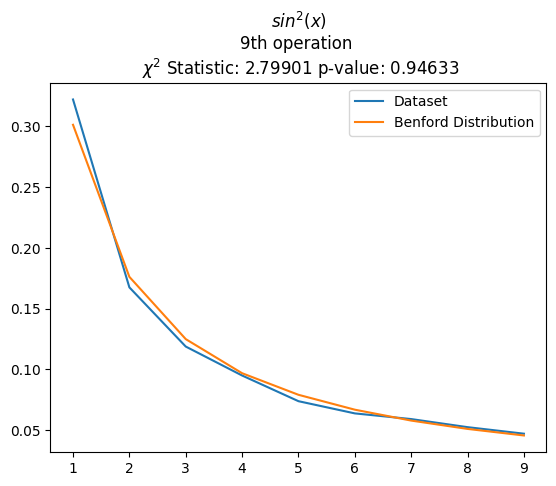

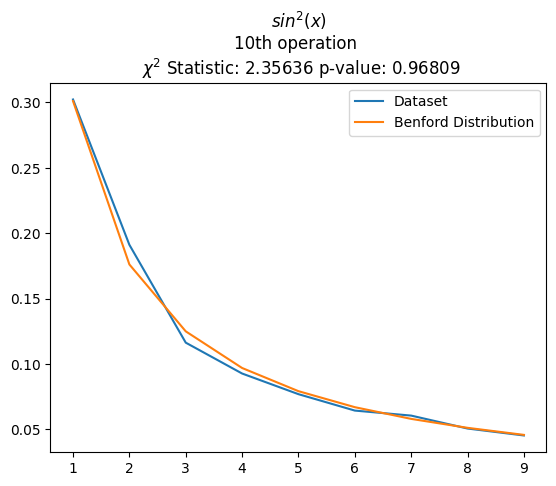

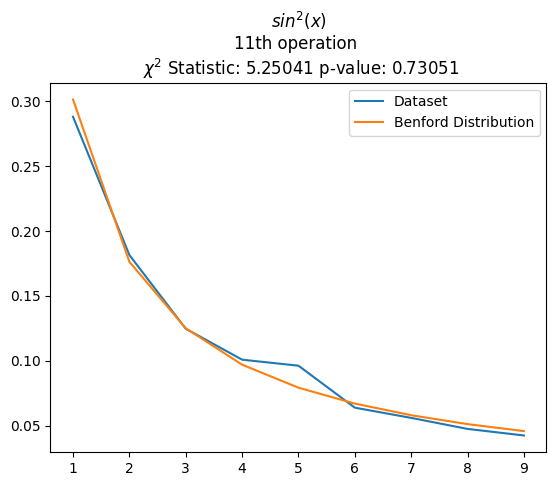

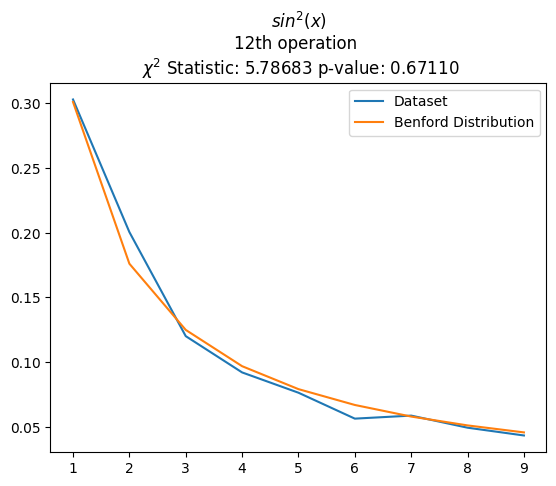

/tmp/ipykernel_14031/50724552.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ben_test/np.sum(ben_test)


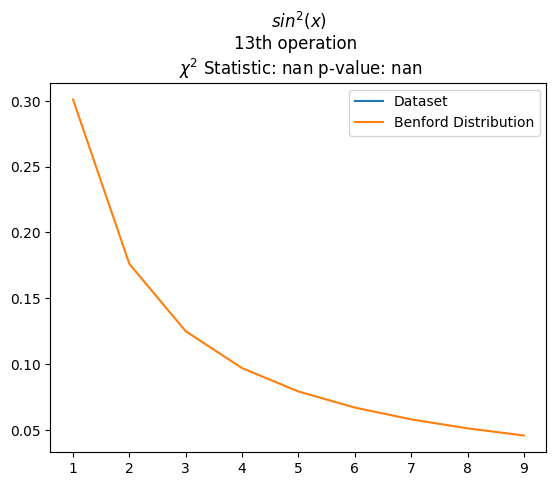

In [89]:
arr_gen_prod = np.random.uniform(-1e6, 1e6, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$sin^2 (x)$')
for i in range(1, 14):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.sin(arr_gen_prod)**2
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$sin^2 (x)$')

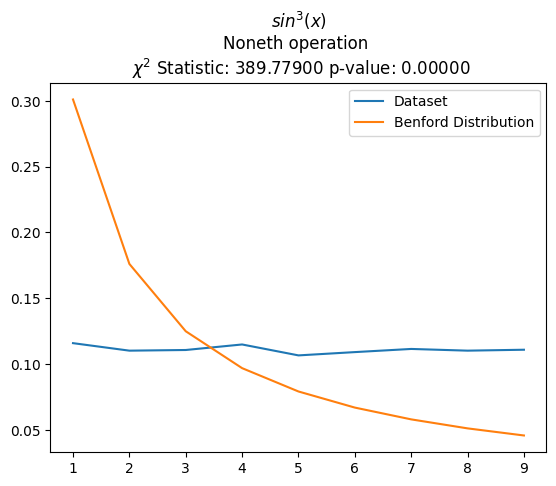

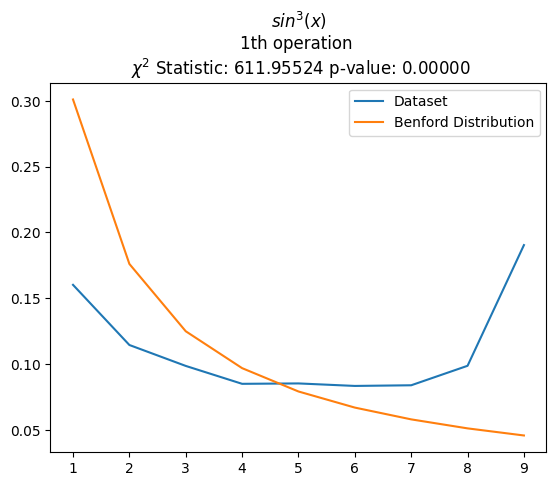

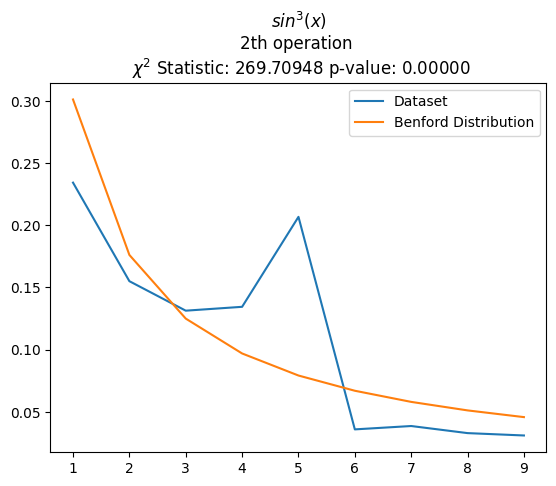

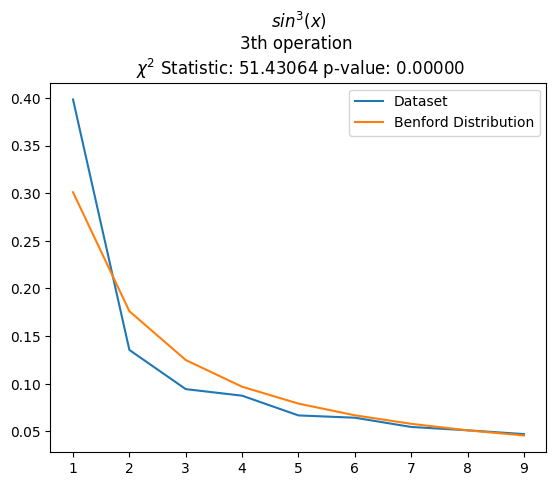

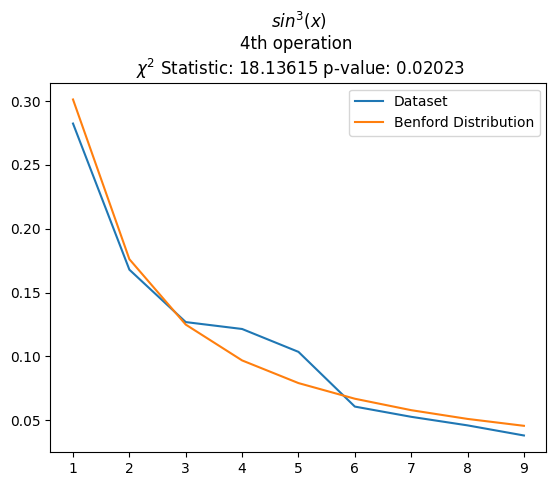

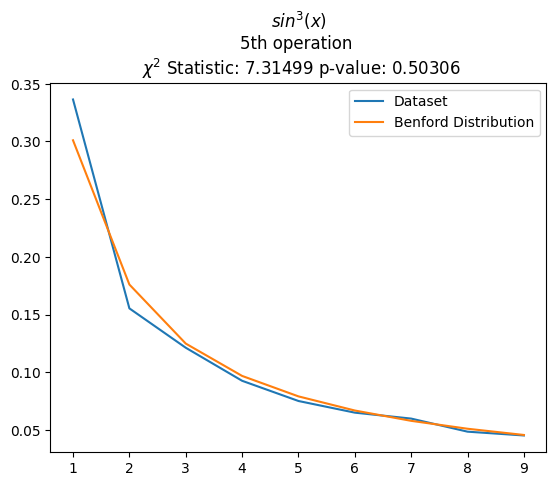

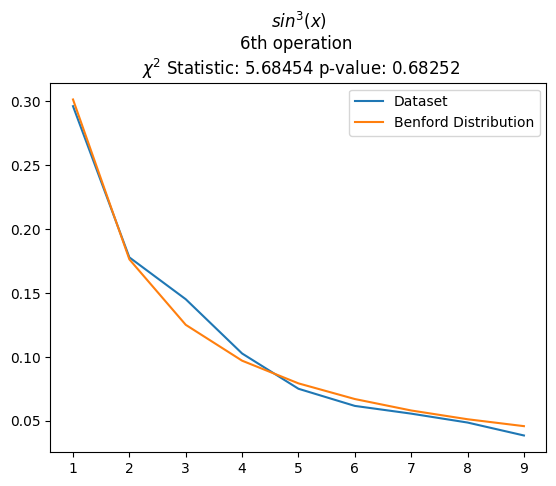

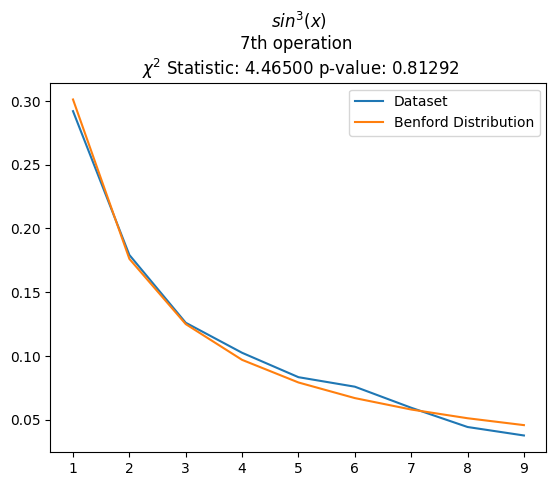

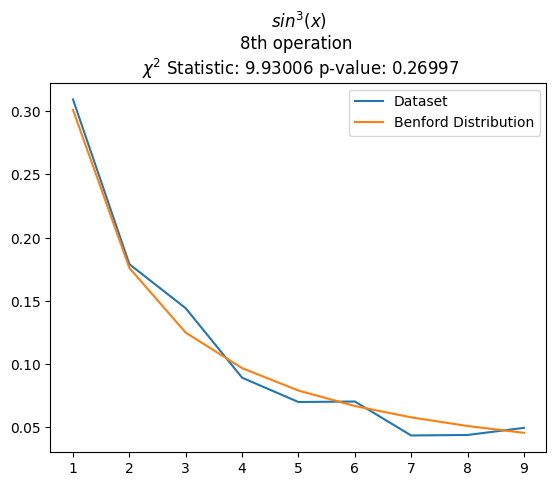

/tmp/ipykernel_14031/50724552.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ben_test/np.sum(ben_test)


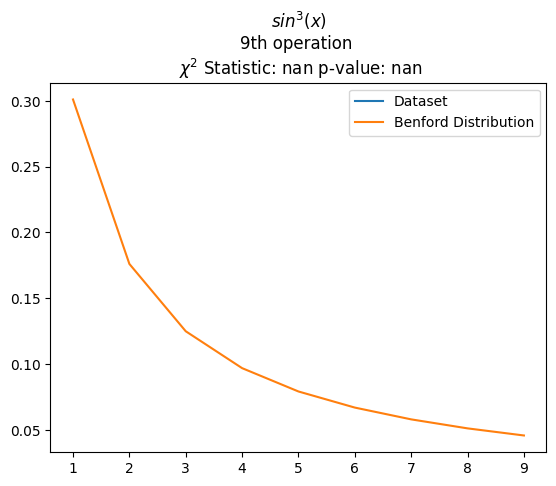

In [95]:
arr_gen_prod = np.random.uniform(-1e6, 1e6, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$sin^3 (x)$')
for i in range(1, 10):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.sin(arr_gen_prod)**3
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$sin^3 (x)$')

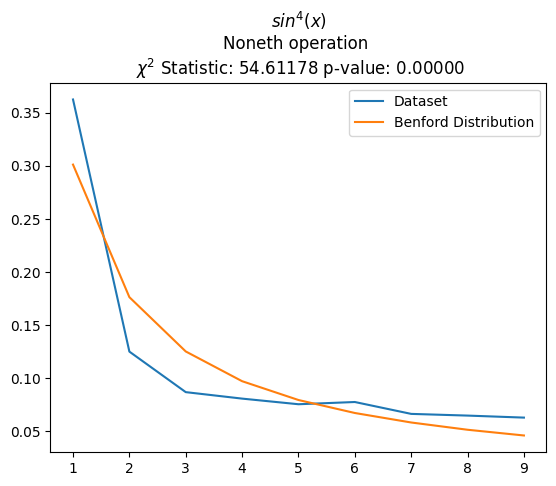

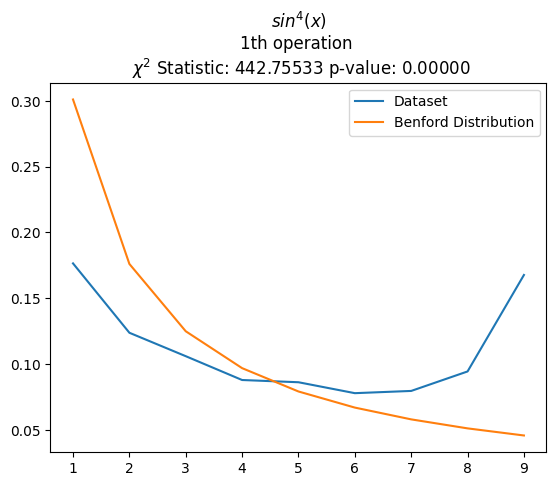

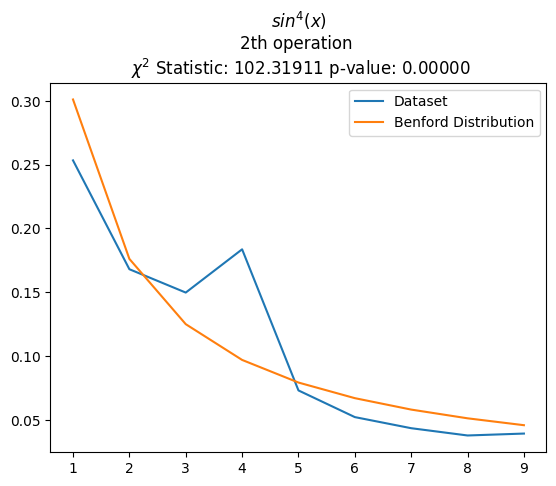

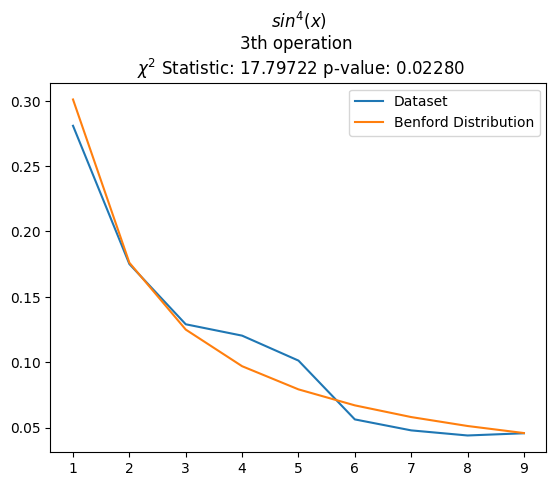

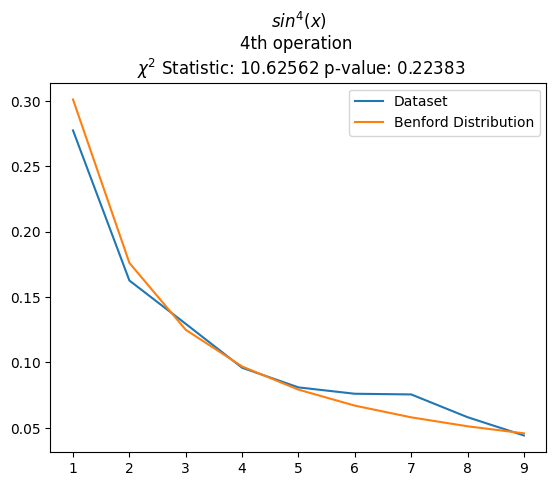

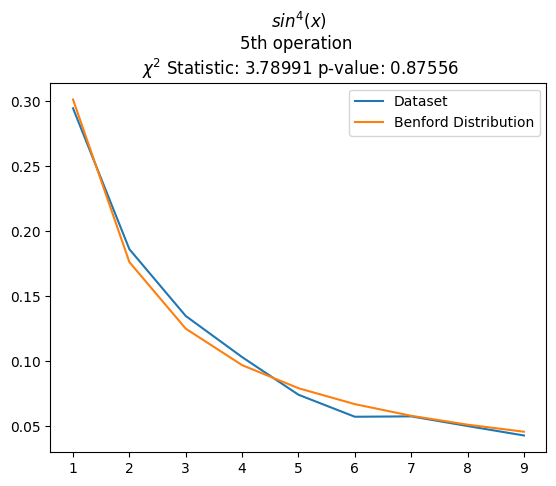

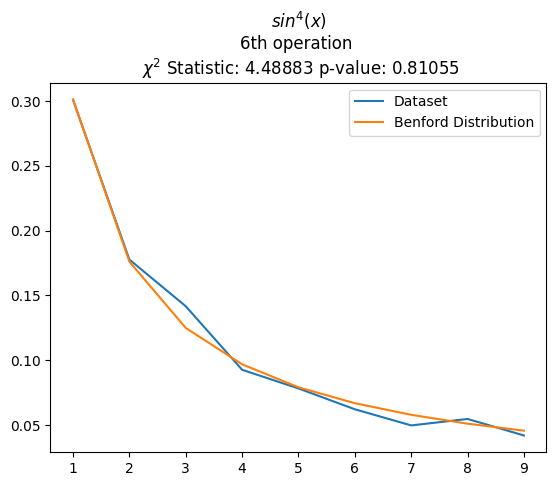

/tmp/ipykernel_14031/50724552.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ben_test/np.sum(ben_test)


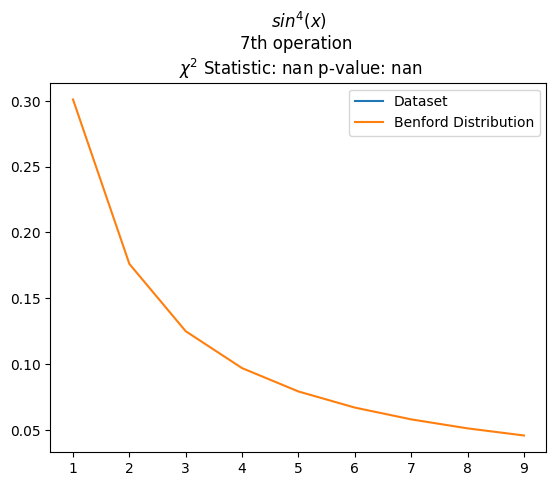

In [99]:
# arr_gen_prod = np.random.uniform(1e-3, 1e6, 10000)
arr_gen_prod = np.random.normal(0, 100, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$sin^4 (x)$')
for i in range(1, 8):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.sin(arr_gen_prod)**4
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$sin^4 (x)$')

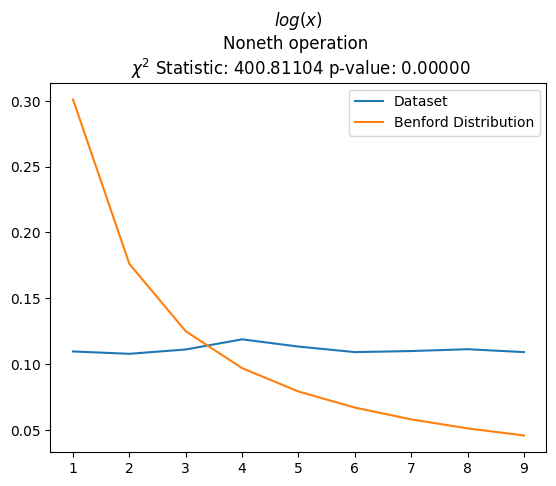

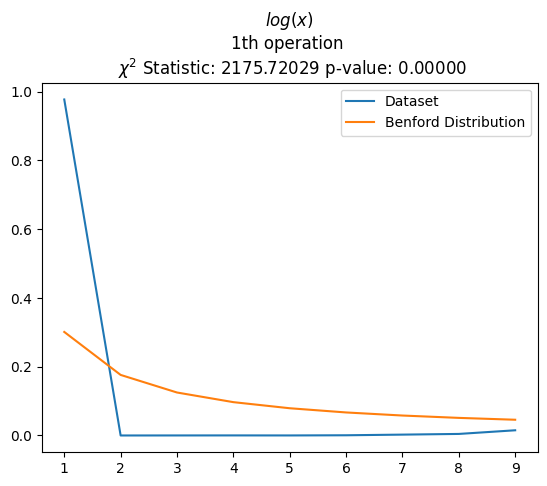

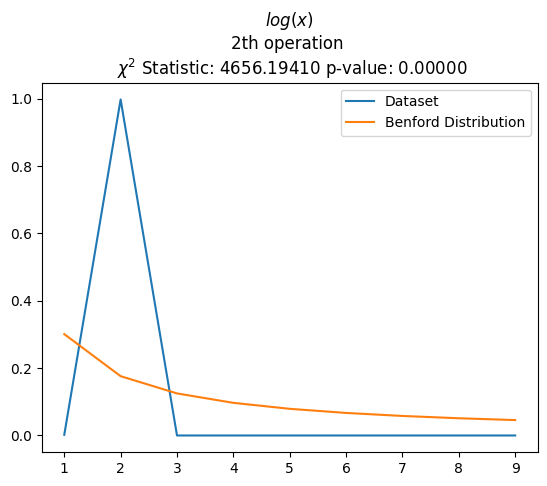

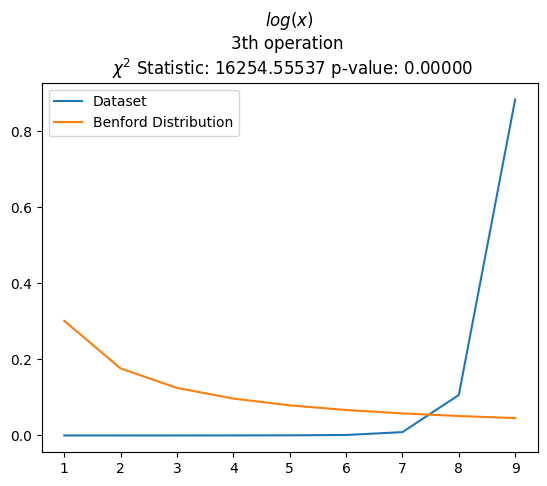

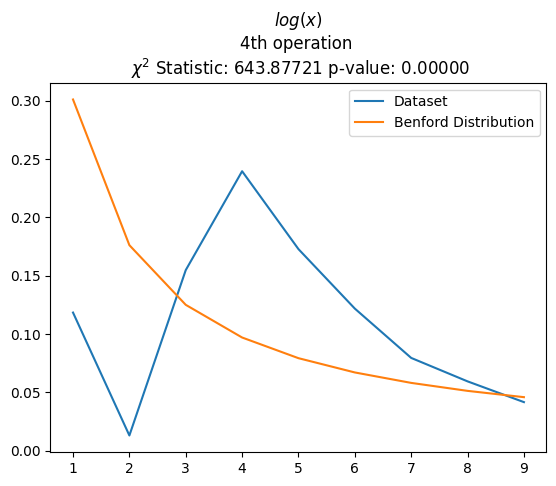

/tmp/ipykernel_14031/354758947.py:10: RuntimeWarning: invalid value encountered in log
  arr_gen_prod = np.log(arr_gen_prod)
/tmp/ipykernel_14031/50724552.py:14: RuntimeWarning: invalid value encountered in true_divide
  return ben_test/np.sum(ben_test)


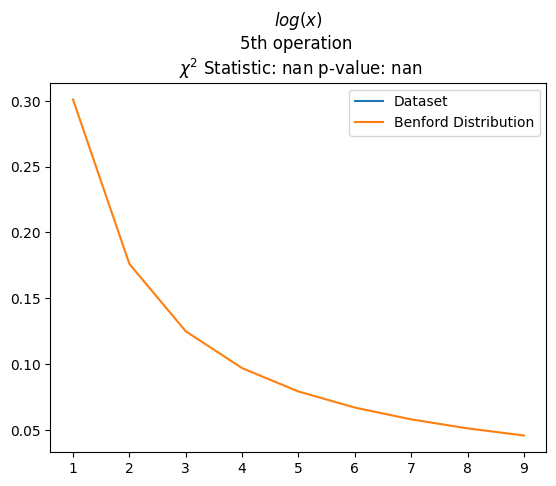

In [104]:
arr_gen_prod = np.random.uniform(1, 1e6, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$log (x)$')
for i in range(1, 6):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.log(arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$log (x)$')

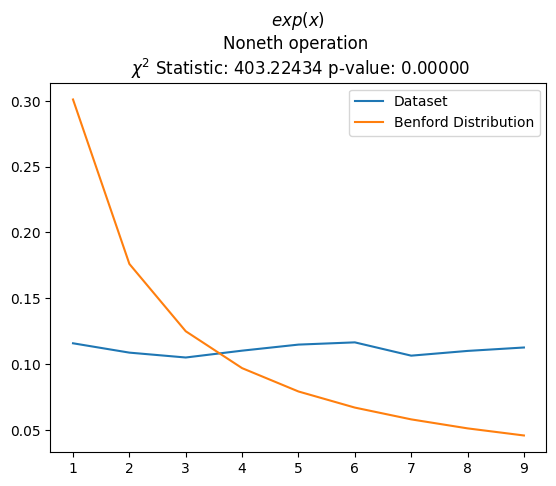

/tmp/ipykernel_14031/468375585.py:10: RuntimeWarning: overflow encountered in exp
  arr_gen_prod = np.exp(arr_gen_prod)


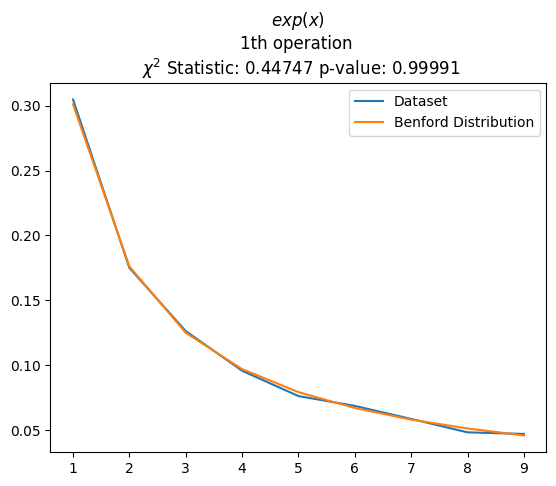

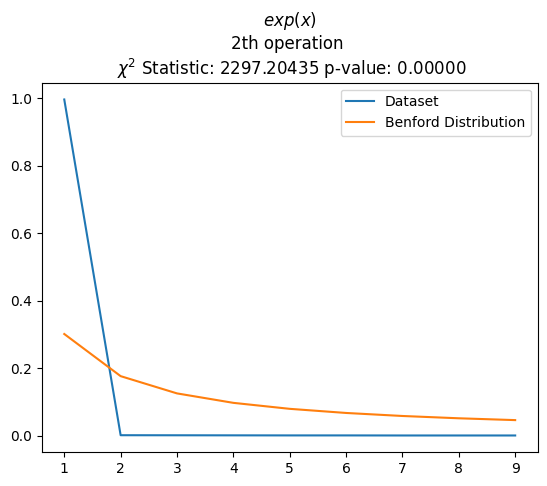

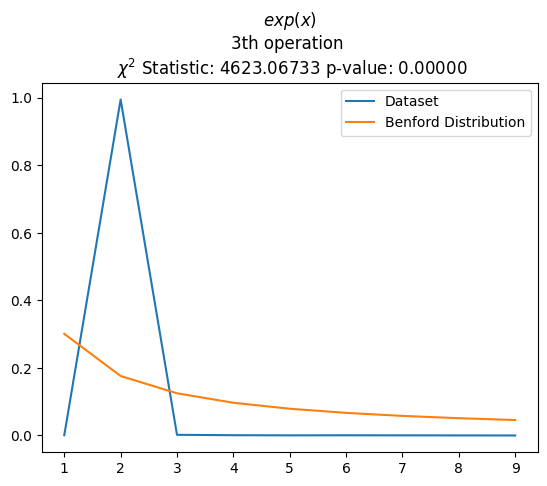

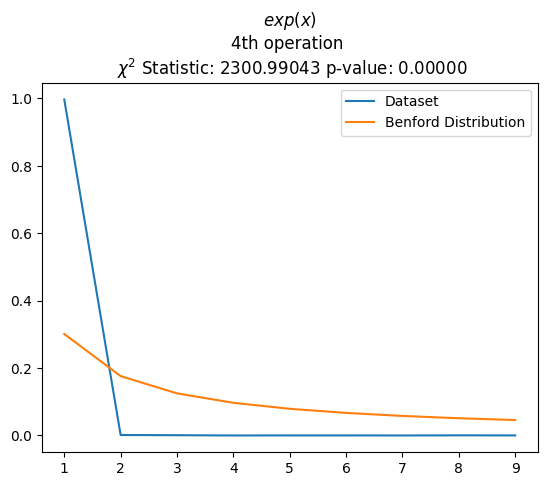

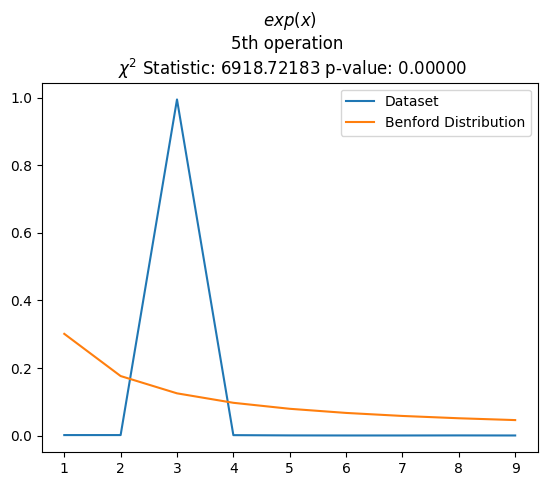

In [107]:
arr_gen_prod = np.random.uniform(-1e3, 1e3, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$exp (x)$')
for i in range(1, 6):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.exp(arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$exp (x)$')

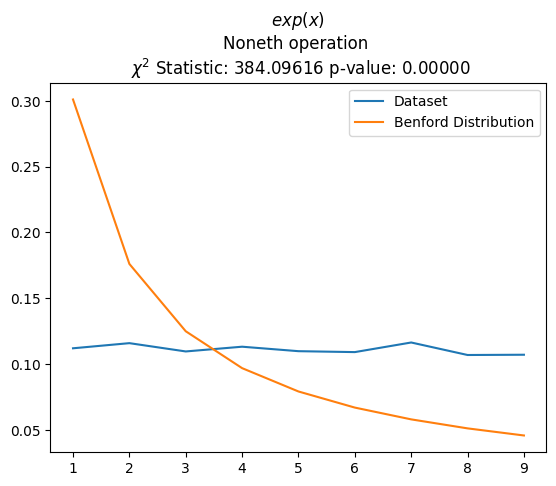

/tmp/ipykernel_14031/3669746509.py:10: RuntimeWarning: overflow encountered in exp
  arr_gen_prod = np.exp(arr_gen_prod)


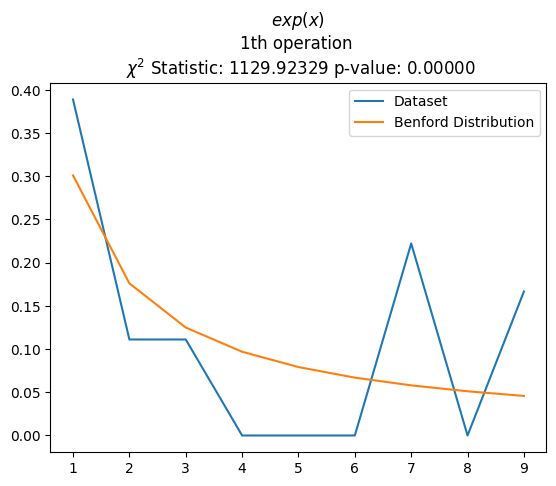

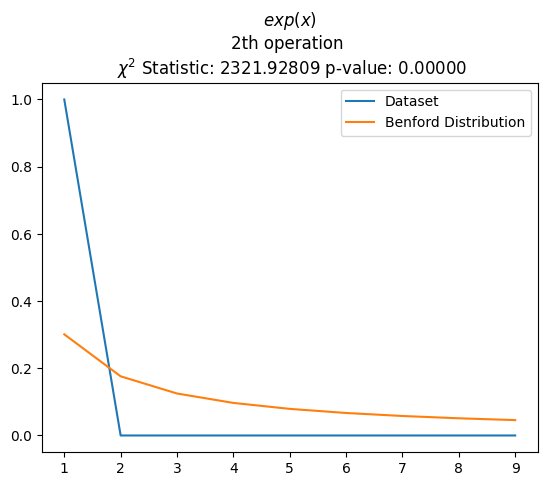

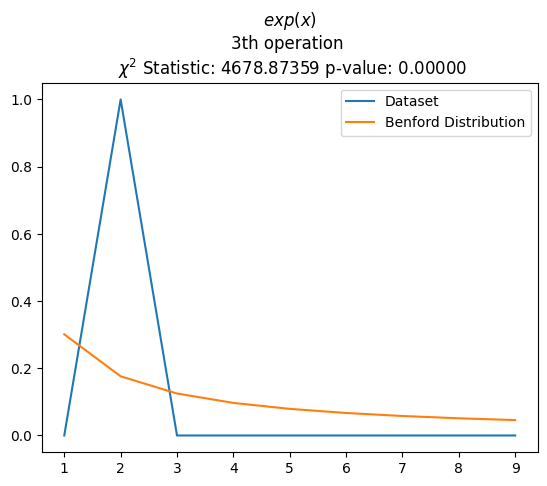

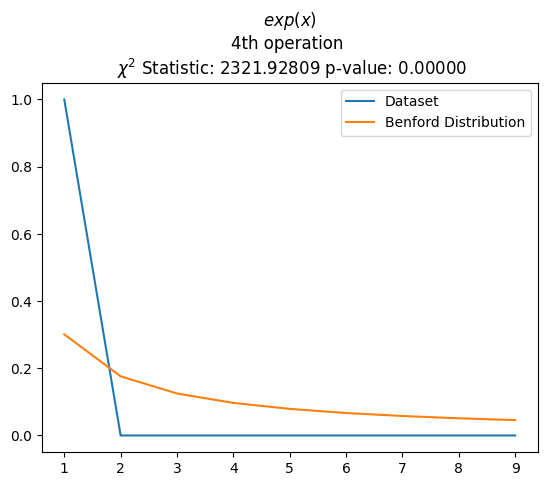

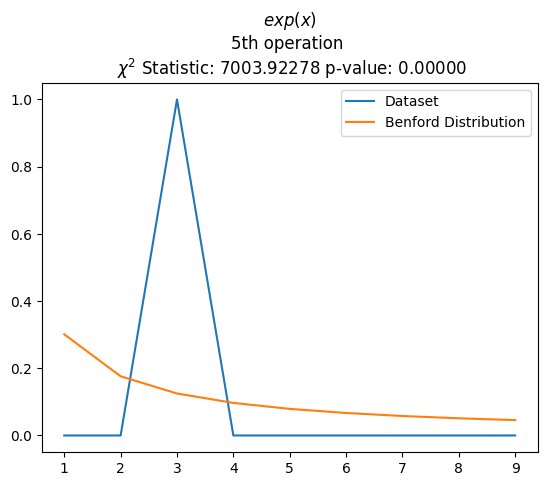

In [115]:
arr_gen_prod = np.random.uniform(-1e3, 1e6, 10000)
# arr_gen_prod = np.sin(arr_gen)**4
chisq_ben(arr_gen_prod, ndigits=10, normalize=True, suptitle=None, fntype='$exp (x)$')
for i in range(1, 6):
    # arr_gen = np.random.randint(1, 10000, 10000)
    
    # arr_gen = np.random.lognormal(loc, scale, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    arr_gen_prod = np.exp(arr_gen_prod)
    chisq_ben(arr_gen_prod, ndigits=10, normalize=True, i=i, suptitle=None, fntype='$exp (x)$')

In [ ]:
#PASS THE ARRAY
# TAKE LOG OF EACH PRODUCT TERM
# TAKE MODULO 1 OF EACH LOG TERM ROUNDED TO 5 DECIMALS ->  SHOULD BE UNIFORMLY DISTRIBUTED

In [114]:
-1.5 % 1

0.5

In [160]:
def chisq_ben(arr, i=None, suptitle=None):
    log_prod = np.log(np.abs(arr))
    mod_prod = np.round(log_prod % 10, 5)
    unitest = np.random.uniform(0, 1, len(mod_prod))
    plt.plot(mod_prod, label='Dataset')
    unibins =  plt.hist(unitest, bins=100, label='Uniform Distribution')


    chisq = stats.chisquare(mod_prod, unitest)
    # plt.plot(pd_cap, label='Dataset')
    plt.plot(p_ndigits, label='Benford Distribution')
    plt.legend()
    # plt.xlim(1, ndigits)
    plt.title(suptitle +'\n' f"Groups of j = {i} random variables taken at a time\n $\chi^2$ Statistic: {chisq[0]:.5f} p-value: {chisq[1]:.5f}")
    # ks_1stat = stats.ks_1samp(pd_cap, temp)
    # print(f"KS Statistic: {ks_1stat[0]:.5f} p-value: {ks_1stat[1]:.5f}")
    plt.show()
    return 1

In [122]:
arr_gen = np.random.uniform(-1e3, 1e6, 10000)
    
def chisq_uni_mod(arr_gen):
    # log_prod = np.log(np.abs(arr_gen))
    # mod_prod = np.round(arr_gen % 1, 5)
    mod_prod = np.round(arr_gen % 1, 5)
    unitest = np.random.uniform(0, 1, len(mod_prod))
    return stats.chisquare(np.histogram(mod_prod)[0], np.histogram(unitest)[0])
# plt.plot(mod_prod, label='Dataset')
# # unibins =  
# plt.hist(mod_prod, bins=100, label='Dataset', density=True)
# plt.hist(unitest, bins=100, label='Uniform Distribution', density=True)
# chisq = stats.chisquare(mod_prod, unitest)

# plt.legend()
# plt.show()

In [125]:
# arr_gen_prod = 1
temp = []
log_arr_gen_prod = 0.0
for i in range(1, 500):
    # arr_gen = np.random.randint(1, 10000, 10000)
    # arr_gen = np.random.uniform(1, 10, 10000)
    # arr_gen = np.random.normal(loc, scale, 10000)
    # arr_gen = np.random.lognormal(0, 100, 10000)
    # arr_gen = np.random.exponential(loc, 10000)
    # arr_gen = np.random.poisson(loc, 10000)
    log_arr_gen = np.log10(np.abs(arr_gen))
    # arr_gen_prod = np.multiply(arr_gen, arr_gen_prod) % 1
    log_arr_gen_prod = np.add(log_arr_gen, log_arr_gen_prod)
    temp.append(chisq_uni_mod(arr_gen_prod))
    # print()

/tmp/ipykernel_14031/435060769.py:6: RuntimeWarning: invalid value encountered in remainder
  mod_prod = np.round(arr_gen % 1, 5)


ValueError: autodetected range of [nan, nan] is not finite

In [205]:
temp

[Power_divergenceResult(statistic=241.65718472037145, pvalue=5.746668871760461e-47),
 Power_divergenceResult(statistic=177.1923655151333, pvalue=1.953327284732834e-33),
 Power_divergenceResult(statistic=169.0477607627702, pvalue=9.742480527096277e-32),
 Power_divergenceResult(statistic=140.18849678491793, pvalue=9.432182011754231e-26),
 Power_divergenceResult(statistic=200.25949922048954, pvalue=2.922953242235786e-38),
 Power_divergenceResult(statistic=219.8444271197386, pvalue=2.256657271082866e-42),
 Power_divergenceResult(statistic=174.95626876161623, pvalue=5.718155343804349e-33),
 Power_divergenceResult(statistic=177.70900388558715, pvalue=1.5239236491768497e-33),
 Power_divergenceResult(statistic=187.11480943955897, pvalue=1.652114919539082e-35),
 Power_divergenceResult(statistic=265.06740322974963, pvalue=6.5369614289117285e-52),
 Power_divergenceResult(statistic=192.67361030240093, pvalue=1.1349722422214387e-36),
 Power_divergenceResult(statistic=174.86498822118494, pvalue=5.97

(array([4.996e+03, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.57834079e-72, 8.58470359e-22, 1.71694072e-21, 2.57541108e-21,
        3.43388144e-21, 4.29235180e-21, 5.15082216e-21, 6.00929252e-21,
        6.86776288e-21, 7.72623324e-21, 8.58470359e-21]),
 <BarContainer object of 10 artists>)

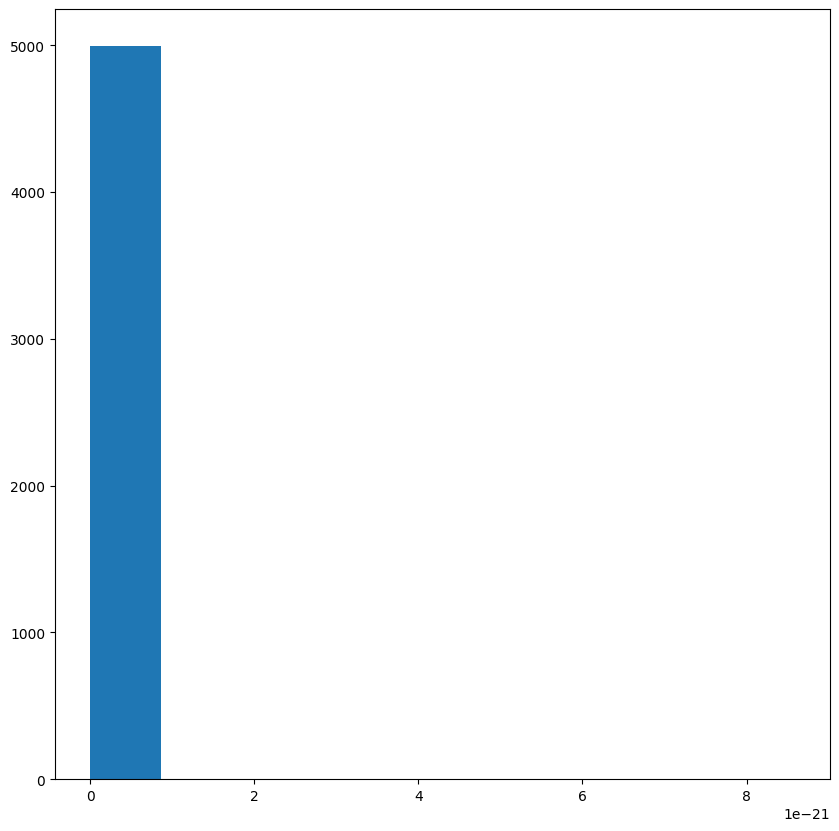

In [206]:
temp = np.array(temp)
plt.figure(figsize=(10, 10))
plt.hist(temp[:,1])

In [152]:
np.shape(temp)

(499, 2)

In [155]:
temp[0]

Power_divergenceResult(statistic=11.667098637373982, pvalue=0.2327338048677934)